In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from learning_lidar.learning_phase.nn_analysis_utils import format_and_plot,plot_pivot_table,generate_results_table
from learning_lidar.utils import global_settings as gs


In [2]:
# set visualization
import seaborn as sns
from learning_lidar.utils import vis_utils
from matplotlib import font_manager

sns.set_palette(sns.color_palette("tab10"))

plt.rcParams['figure.dpi'] = vis_utils.FIGURE_DPI
plt.rcParams['savefig.dpi'] = vis_utils.SAVEFIG_DPI

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rc('text', usetex=False)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [4]:
load_preloaded_results = True
overlap = False
results_folder = os.path.join(gs.PKG_ROOT_DIR, 'results')

# postprocessing LCNET results from jason state files saved in  `runs_board.xlsx`

In [5]:
if not load_preloaded_results:
    total_results = generate_results_table(results_folder=results_folder,experiments_table_fname='runs_board.xlsx')
else:
    current_res_fname = os.path.join(results_folder,'curr_total_results.csv')
    total_results = pd.read_csv(current_res_fname)


In [12]:
analyse_results = total_results[total_results.training_iteration>=1]
analyse_results = analyse_results[analyse_results.overlap==overlap]
analyse_results = analyse_results[analyse_results.u_hsize]
use_bg = []
for idx, row in total_results.iterrows():
        flag_bg = row.use_bg
        if type(flag_bg) == str:
            if flag_bg == 'False' or flag_bg == 'True':
                use_bg.append(eval(flag_bg))
            else:
                use_bg.append(flag_bg)
        else:
            use_bg.append(flag_bg)
total_results['use_bg'] = use_bg

In [14]:
lidar_res

,Unnamed: 0,trial_id,date,time_total_s,training_iteration,loss,MARELoss,bsize,dfilter,dnorm,...,db,overlap,logdir,pow_y,pow_x1,pow_x2,pow_x3,u_hsize,wavelength,config
0,0,f63a1_00010,2021-05-20_14-32-54,368.413288,3,28.360804,0.184768,32,NaN,False,...,initial,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.5,0.5,-0.20,NaN,True,all,C
1,1,f63a1_00012,2021-05-20_14-50-40,523.387588,4,30.198555,0.189092,32,NaN,False,...,initial,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.5,0.5,0.25,NaN,True,all,Other
2,2,f63a1_00006,2021-05-20_14-00-42,315.922819,3,30.785040,0.189882,32,NaN,False,...,initial,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.5,0.5,-0.20,NaN,True,all,Other
3,3,f63a1_00002,2021-05-20_13-33-52,487.011101,4,27.449078,0.166987,32,NaN,False,...,initial,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.5,0.5,0.50,NaN,True,all,A
4,4,f63a1_00013,2021-05-20_14-59-09,500.420166,4,22.650684,0.140605,32,NaN,False,...,initial,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.5,0.5,0.25,NaN,True,all,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1093,28520_00006,2022-02-01_03-00-14,1329.818016,23,1556.882080,0.095098,32,"['wavelength', [355]]",False,...,extended,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,1.0,0.5,0.30,1.0,True,355,E
1099,1099,28520_00024,2022-02-01_12-29-30,318.184697,5,3025.655273,0.182373,32,"['wavelength', [355]]",False,...,extended,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,1.0,0.5,0.30,0.5,True,355,E
1100,1100,28520_00007,2022-02-01_03-18-44,712.934740,12,1405.848755,0.089324,32,"['wavelength', [355]]",False,...,extended,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,1.0,0.5,0.30,1.0,True,355,Other
1105,1105,28520_00019,2022-02-01_09-55-33,1203.001586,20,1369.867188,0.086672,32,"['wavelength', [355]]",False,...,extended,False,C:\Users\addalin\Dropbox\Lidar\lidar_learning\...,0.1,0.5,-0.30,0.5,True,355,Other


## 1. Choosing Learning rate
1. X: range_corr(lidar), attbsc(molecular). Y:LC
> use_normalization = False
> use_power = True
> source = lidar

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


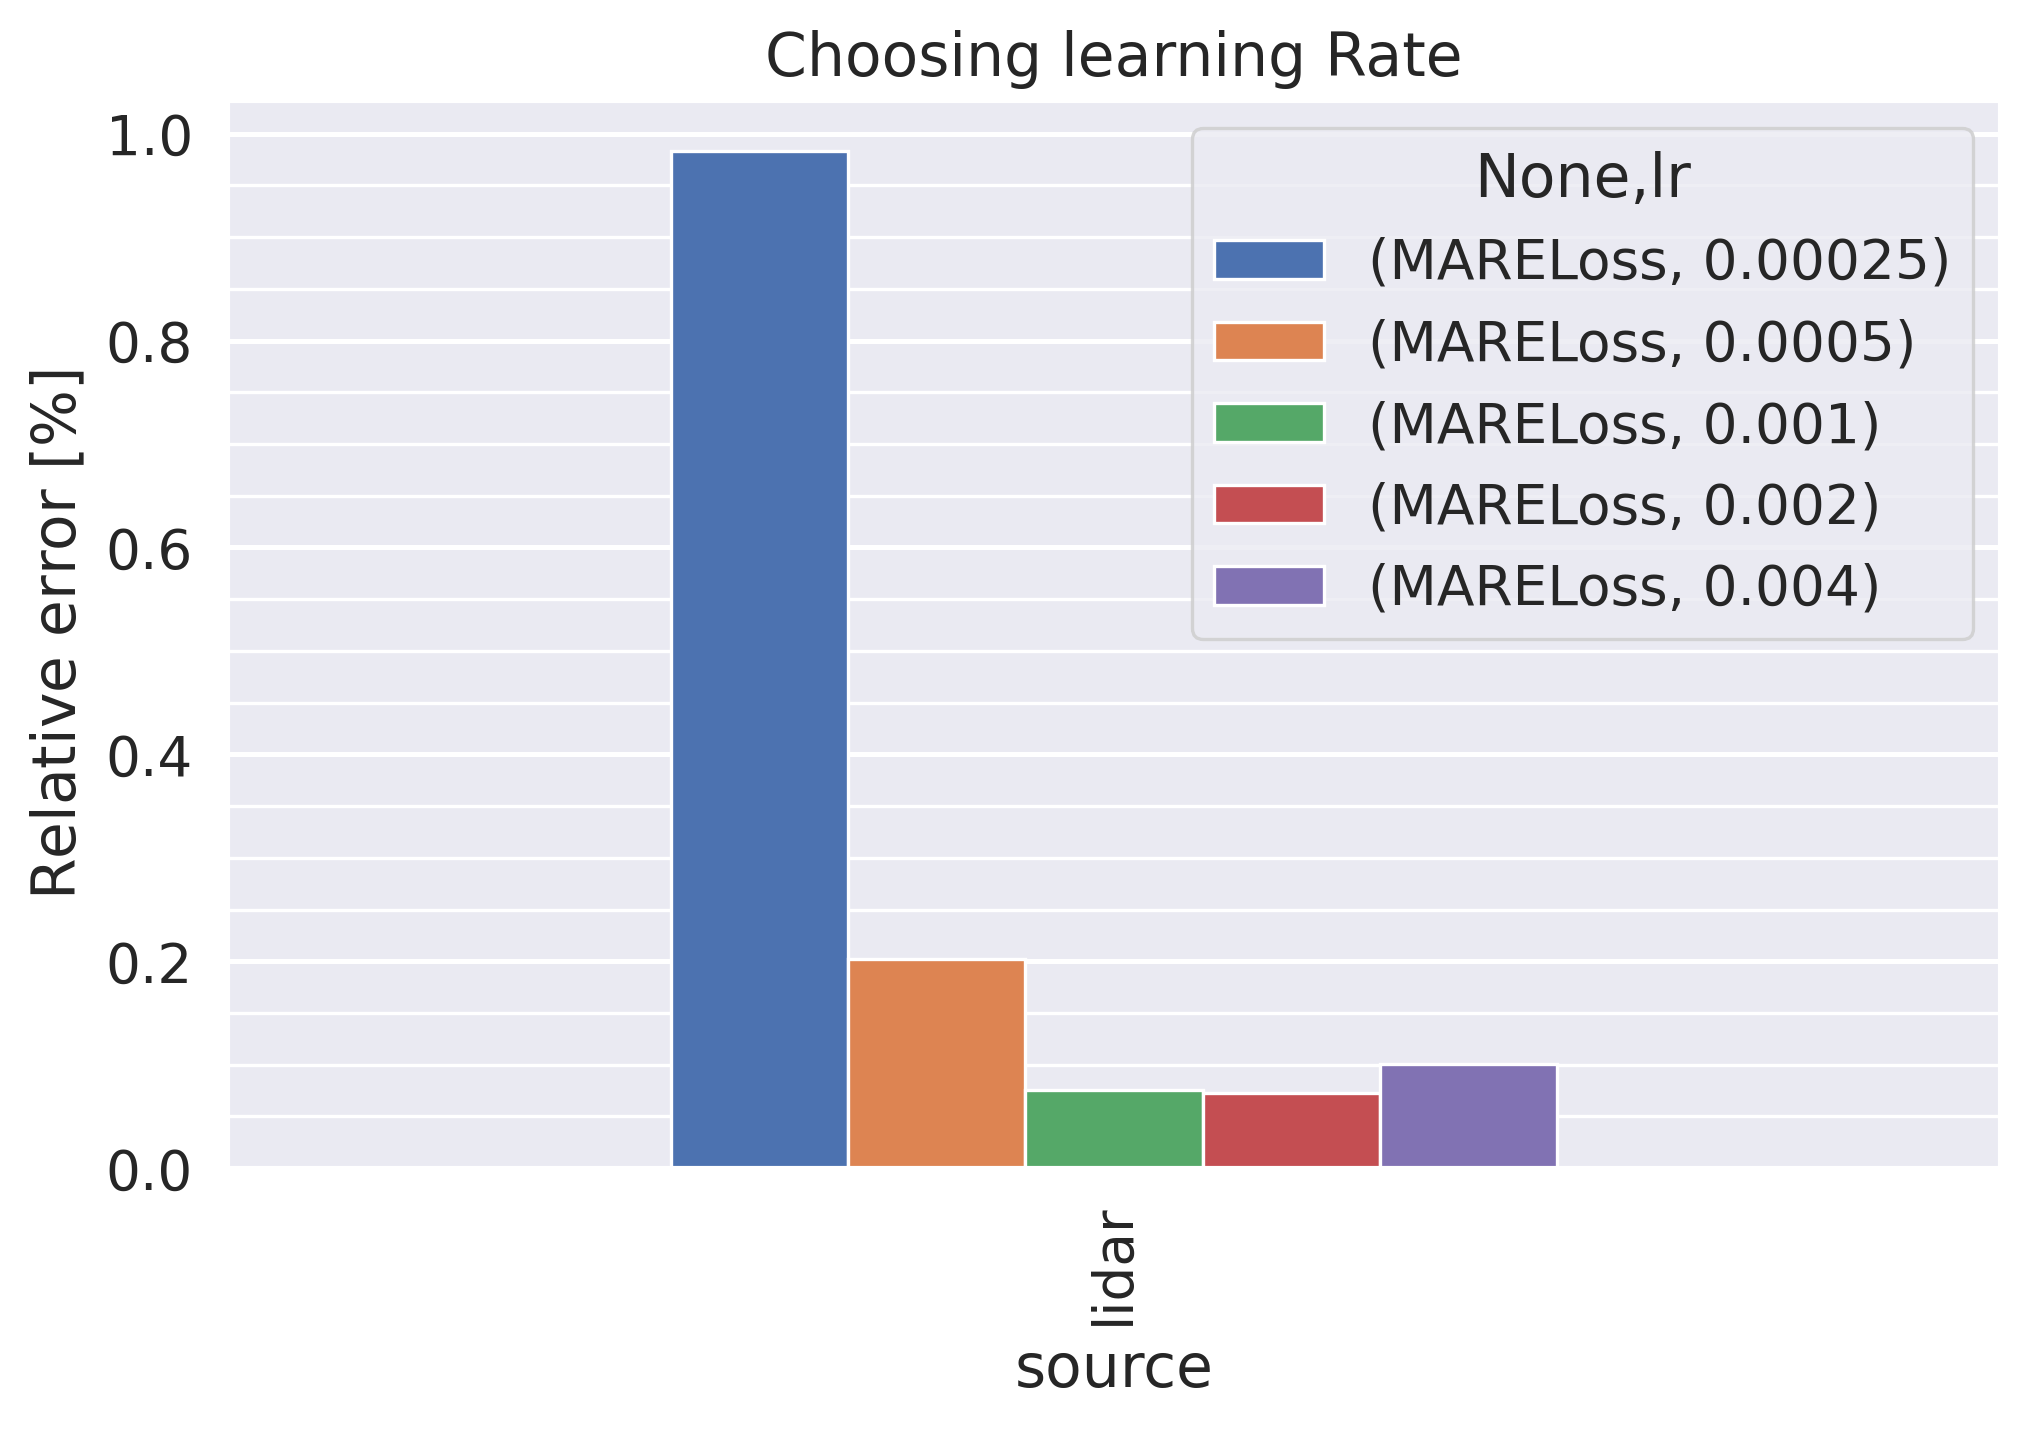

In [15]:
lidar_res = analyse_results[analyse_results.source=='lidar' ]
lidar_res = lidar_res[lidar_res.use_bg==False]
pow_lidar = lidar_res[(~lidar_res.dnorm & lidar_res.use_power ) ]

p_table = pd.pivot_table(pow_lidar[pow_lidar.bsize==32][pow_lidar.fc_size>4],#[pow_lidar.note=='ok'],
               values=['MARELoss'],
               columns= ['lr'],
               index=['source'],#'fc_size'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Choosing learning Rate')

## 2. FC vs. hidden sizes
1. X: range_corr(lidar), attbsc(molecular). Y:LC
> use_normalization = False
> use_power = True
> source = lidar
> lr = 0.001 or lr = 0.005

In [16]:
all_wav = analyse_results #[analyse_results.wavelength=='all']
all_wavs_configABCD = all_wav[all_wav.config!='Other']

C:\Users\addalin\AppData\Local\Temp\ipykernel_18668\29177738.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]


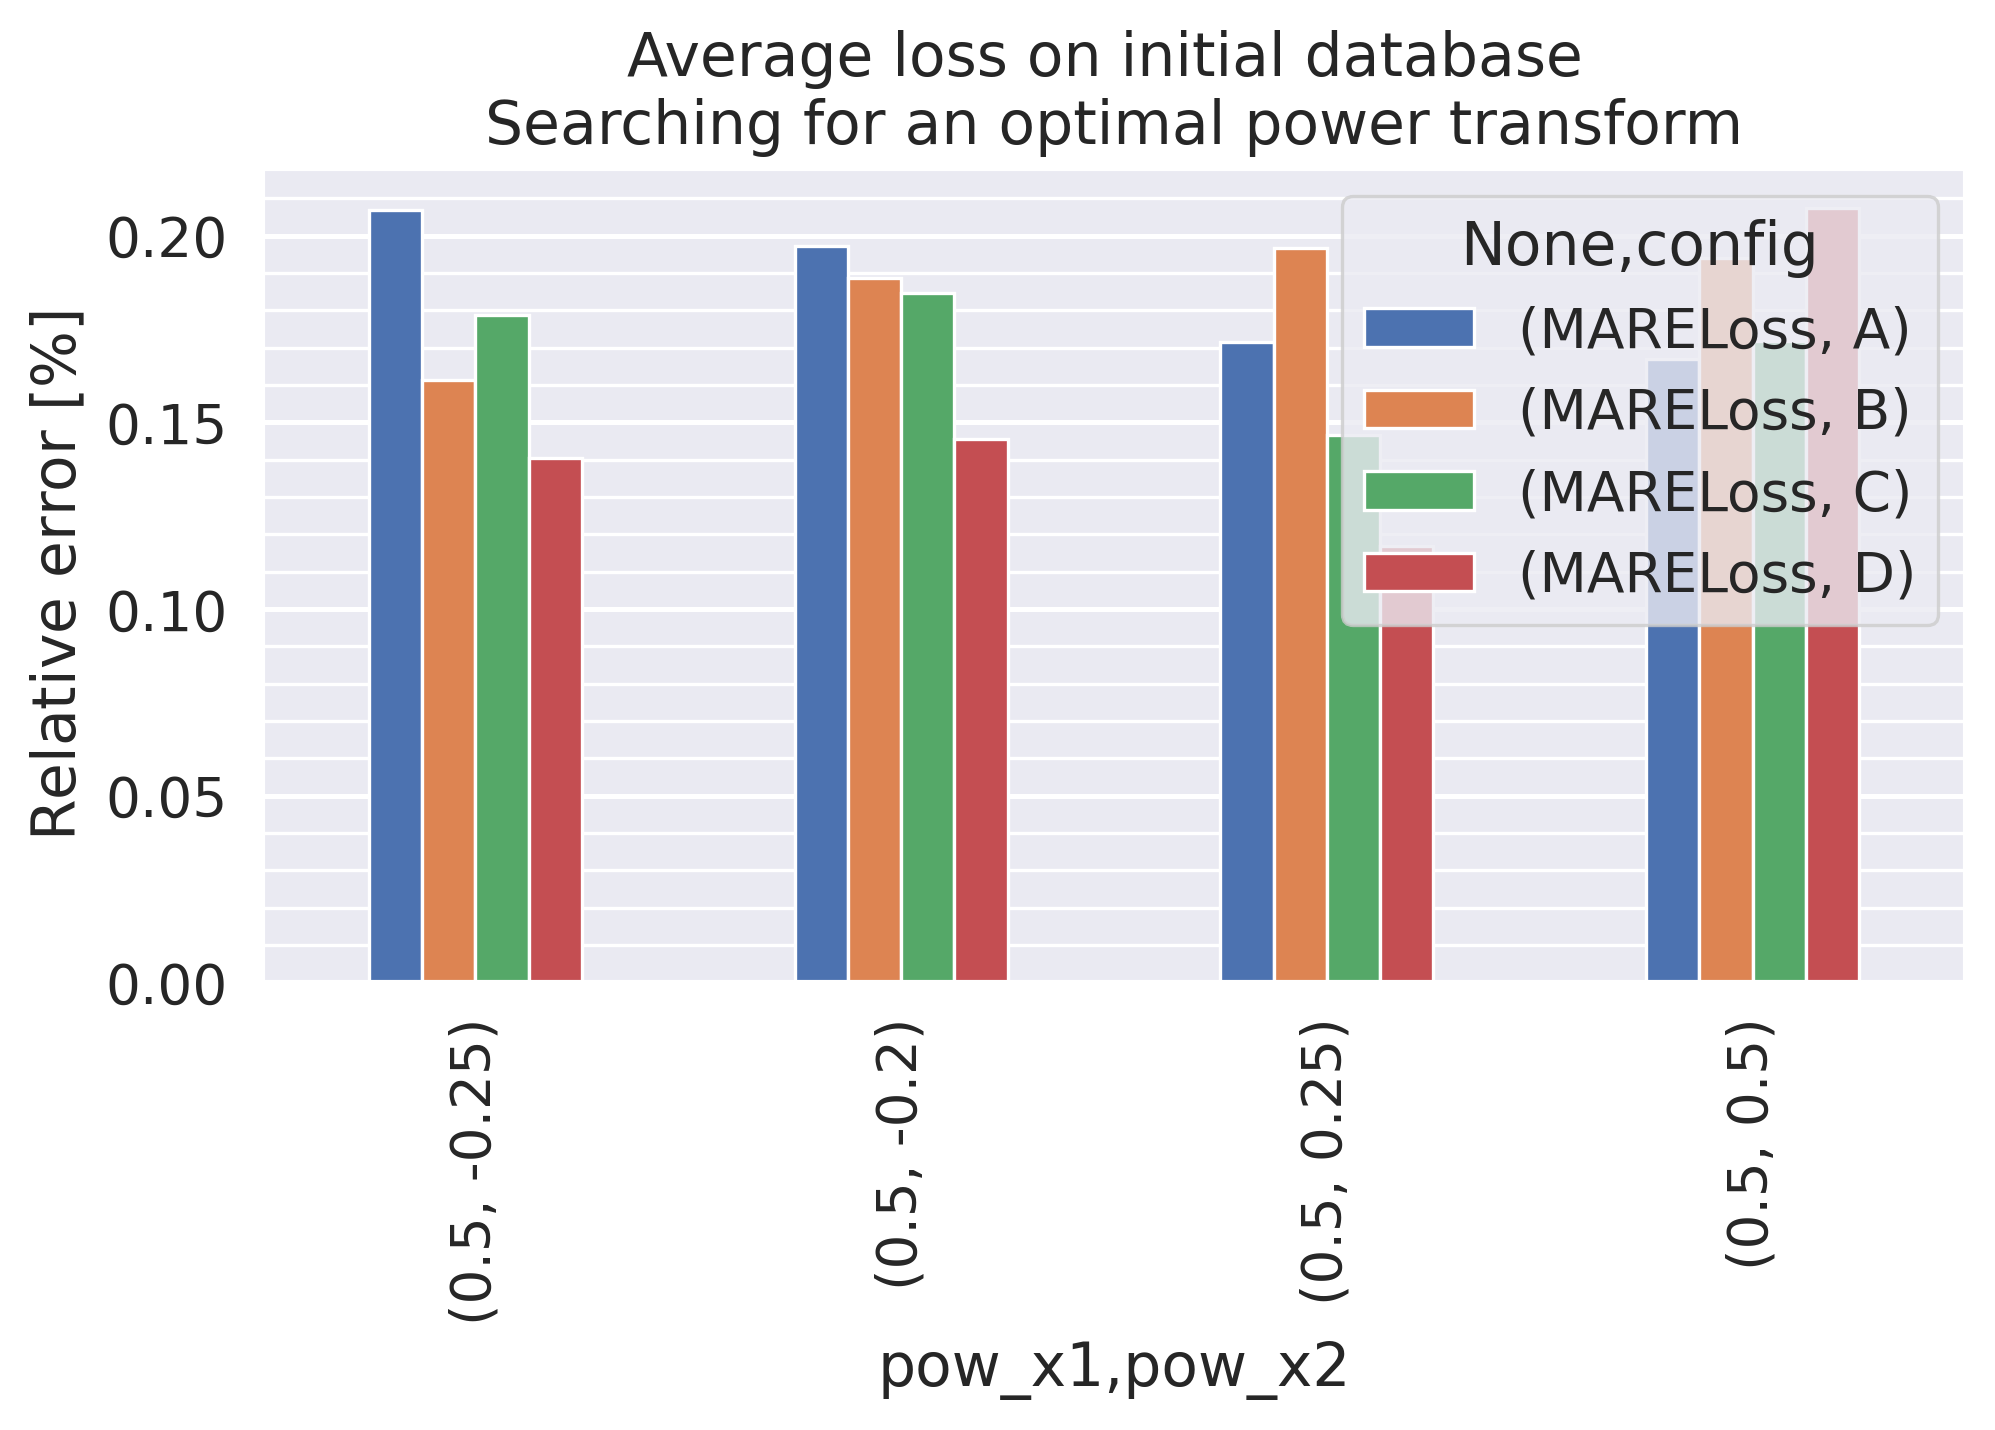

In [17]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
               [all_wavs_configABCD.use_bg!='range_corr']
               [all_wavs_configABCD.use_power!=False]
               [all_wavs_configABCD.db=='initial'][all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['pow_x1','pow_x2'],
               aggfunc=np.mean)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on initial database \n Searching for an optimal power transform ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_18668\1099465393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]


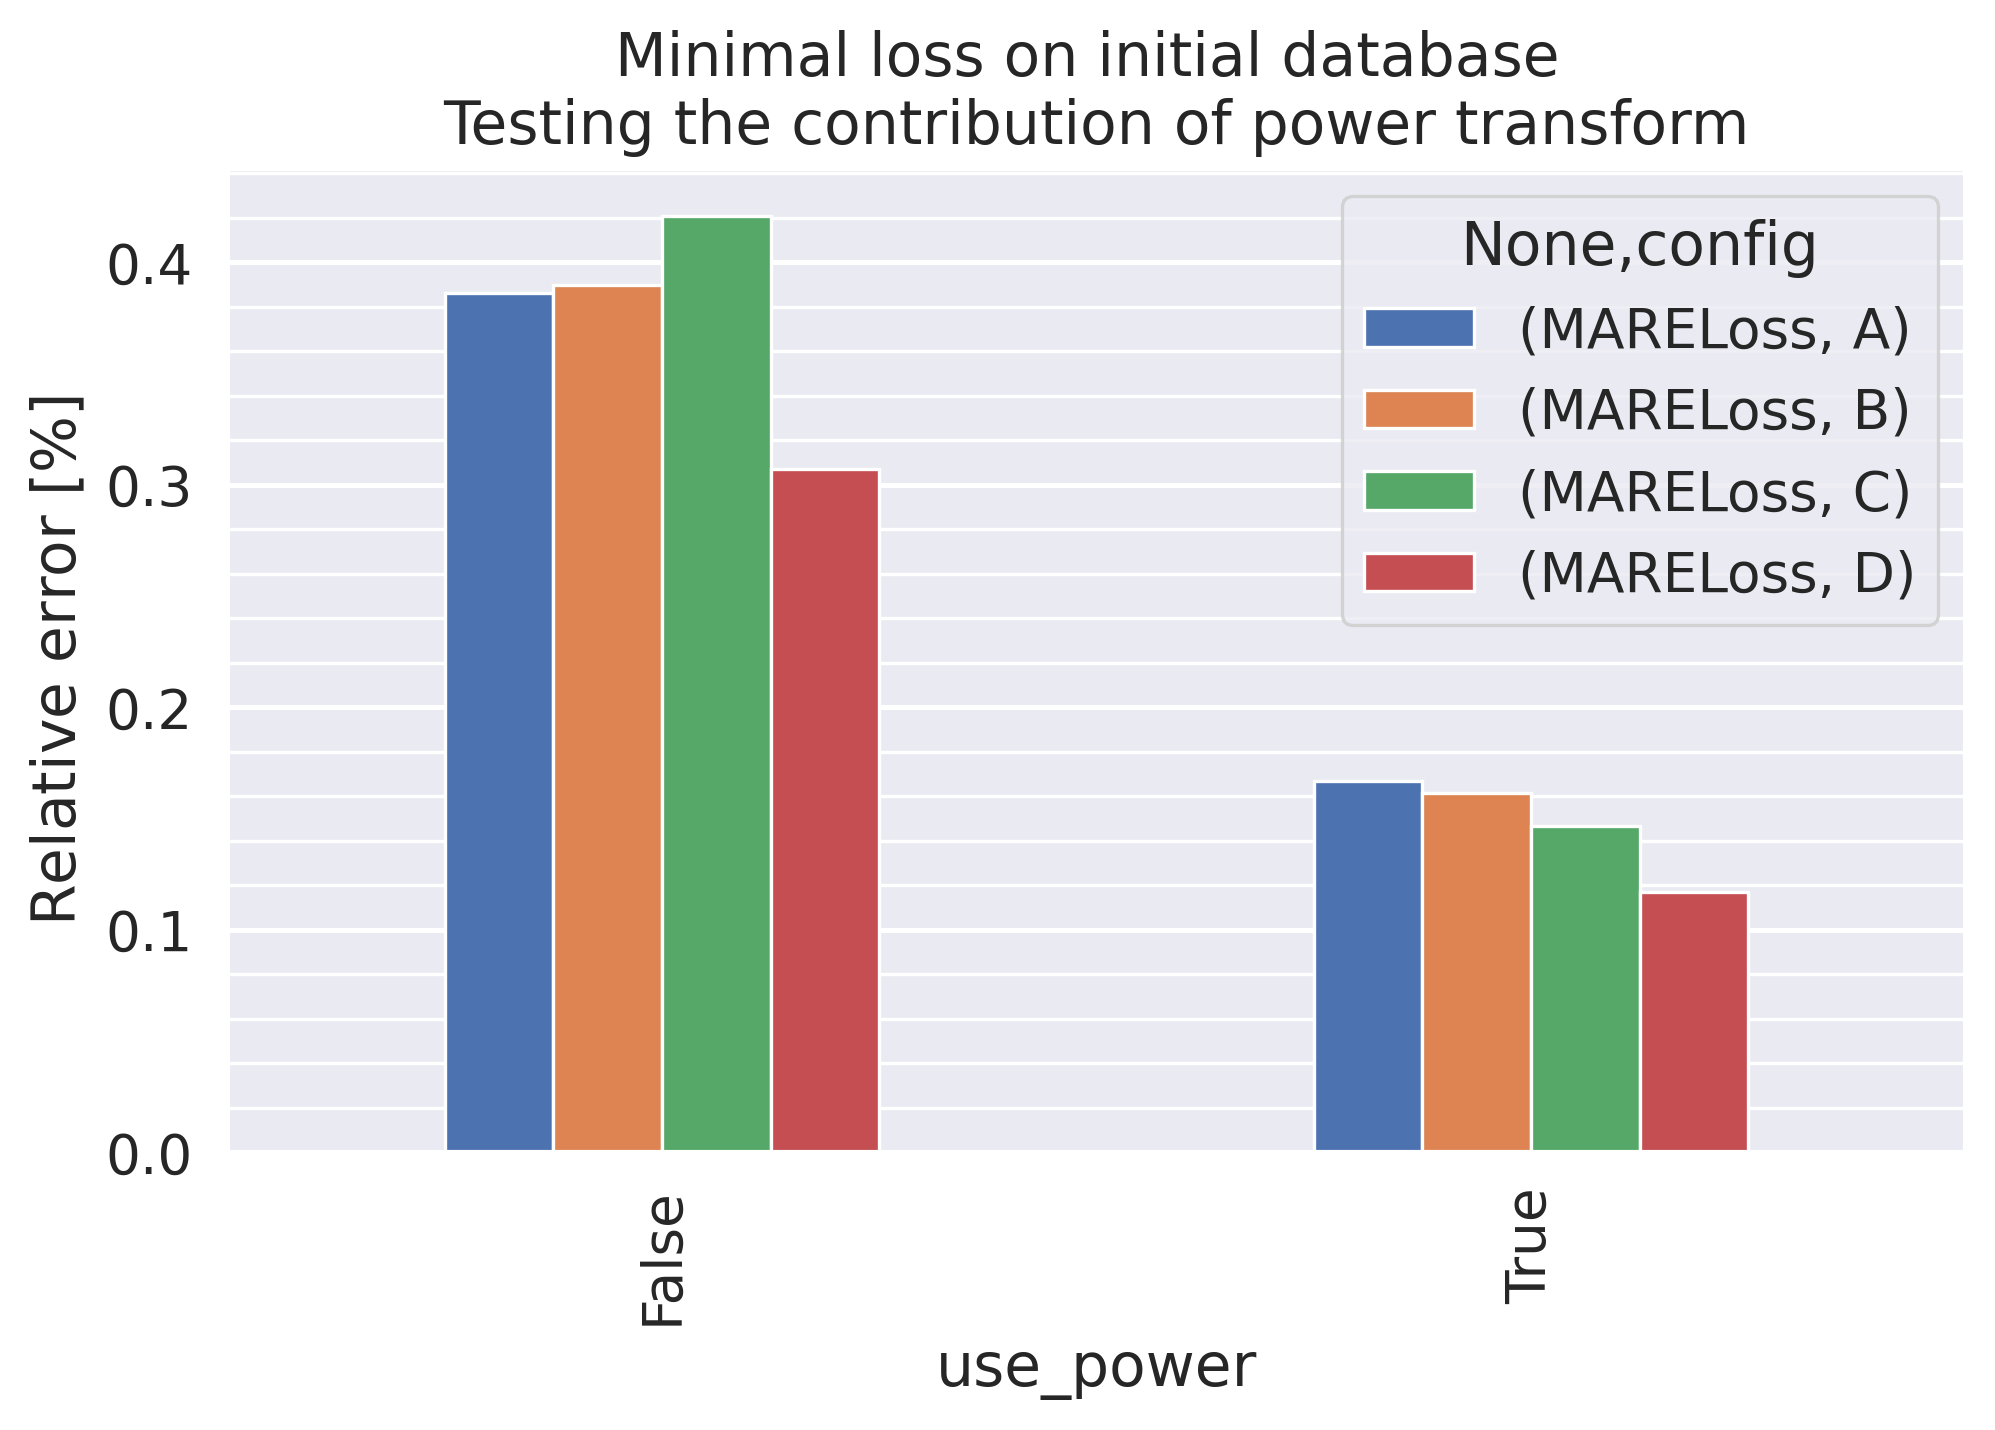

In [18]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
                         [all_wavs_configABCD.use_bg!='range_corr']
                         [all_wavs_configABCD.db=='initial']
                         [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on initial database \n Testing the contribution of power transform ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1568946709.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False][all_wavs_configABCD.db=='initial'],


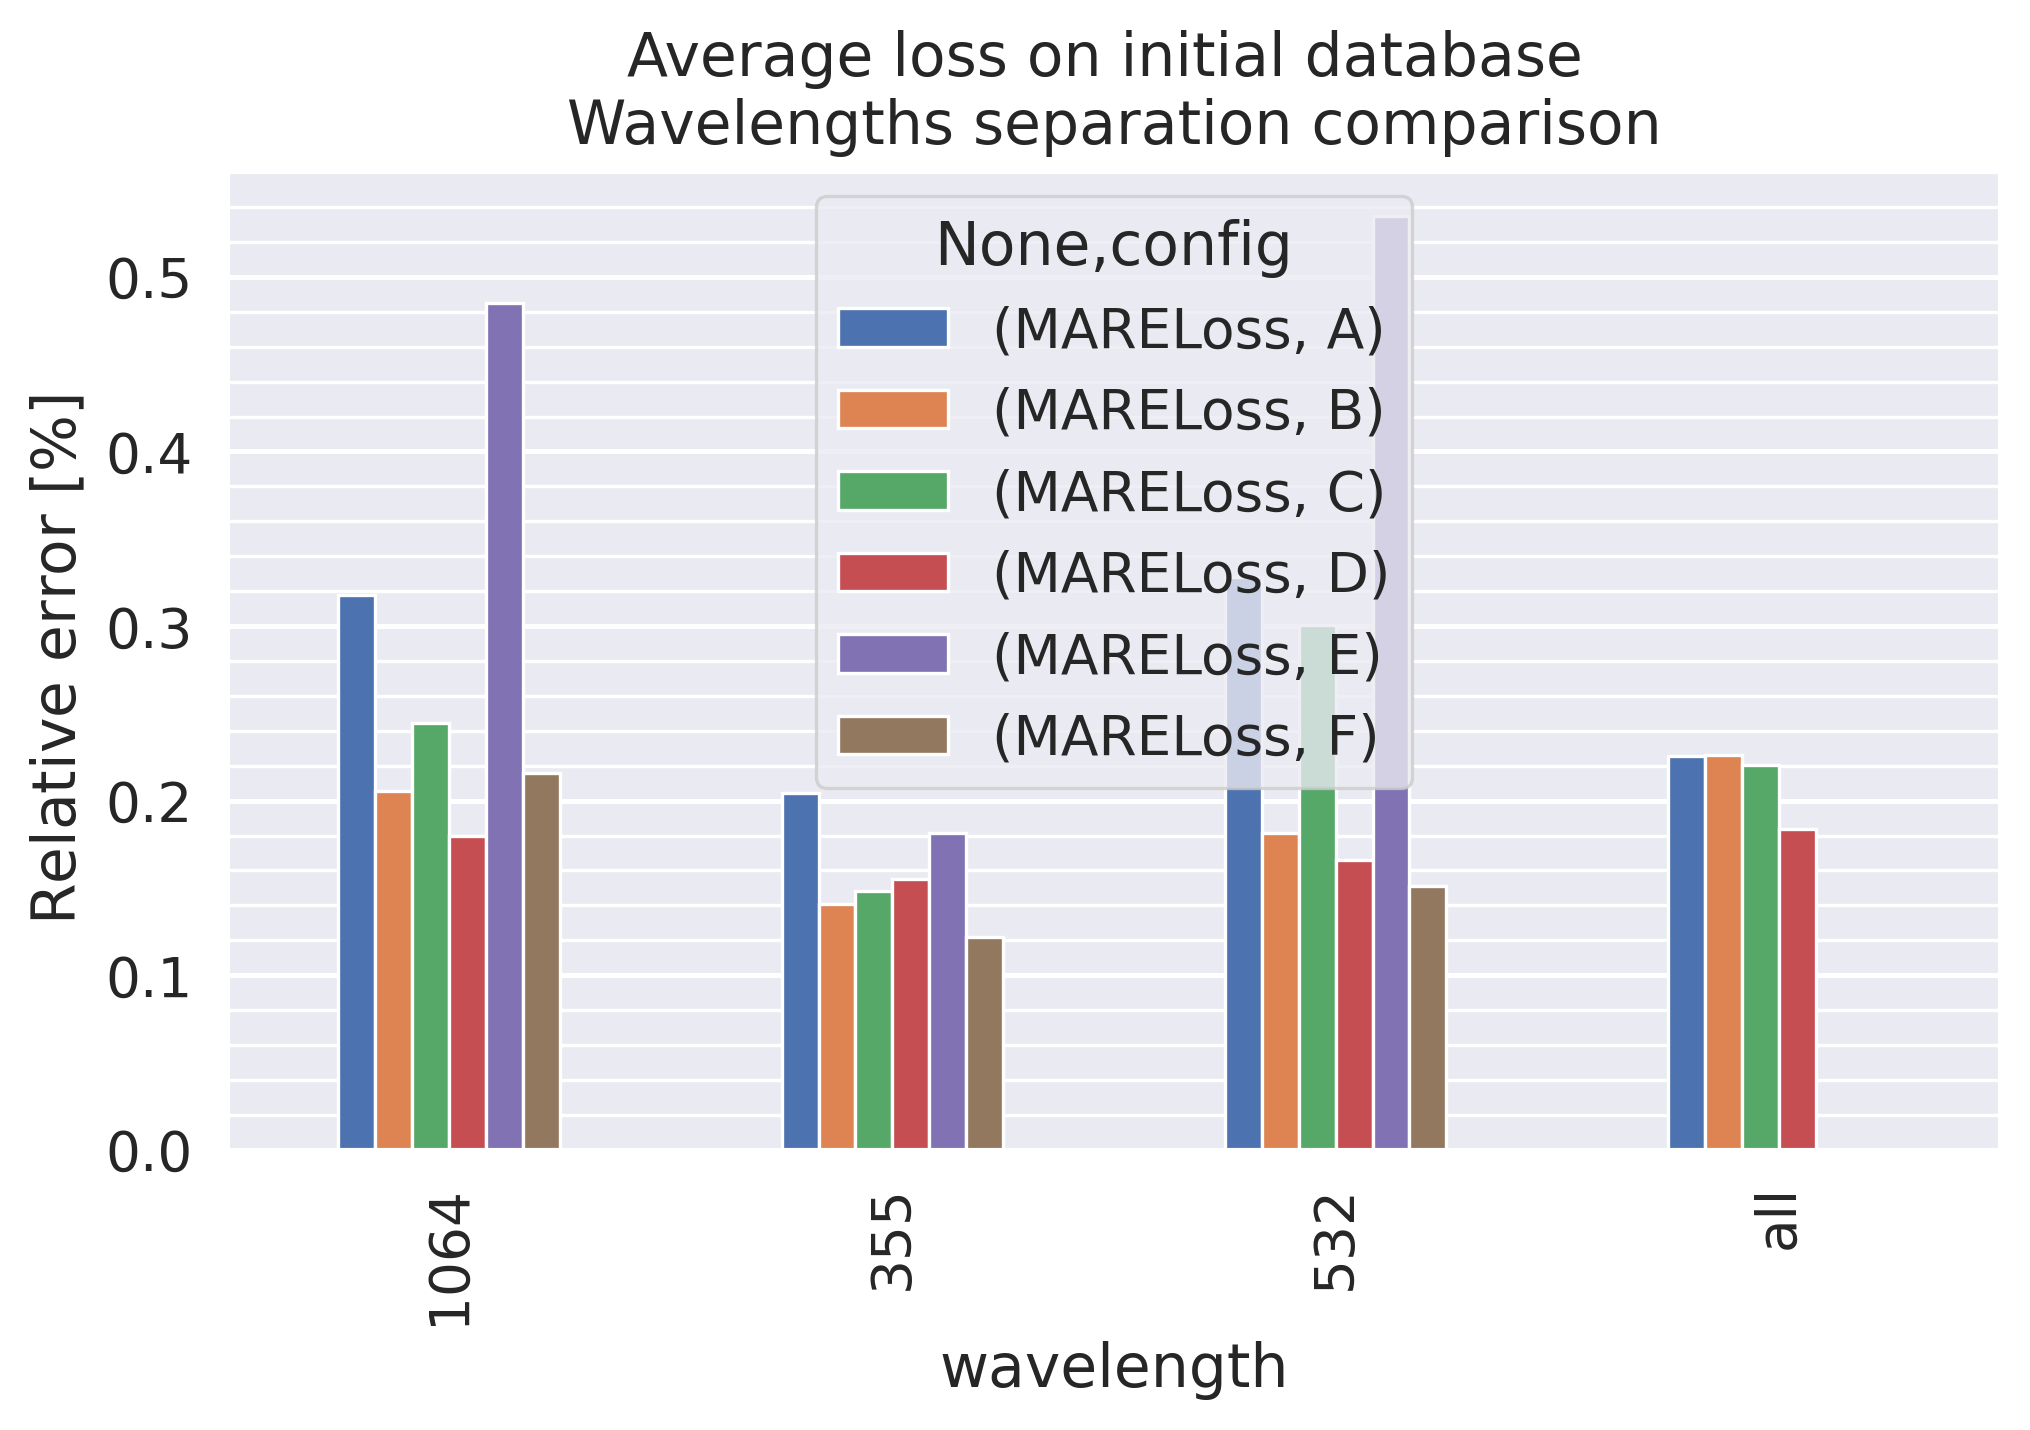

In [28]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False][all_wavs_configABCD.db=='initial'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength'],
               aggfunc=np.mean)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on initial database \n Wavelengths separation comparison ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1615952314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


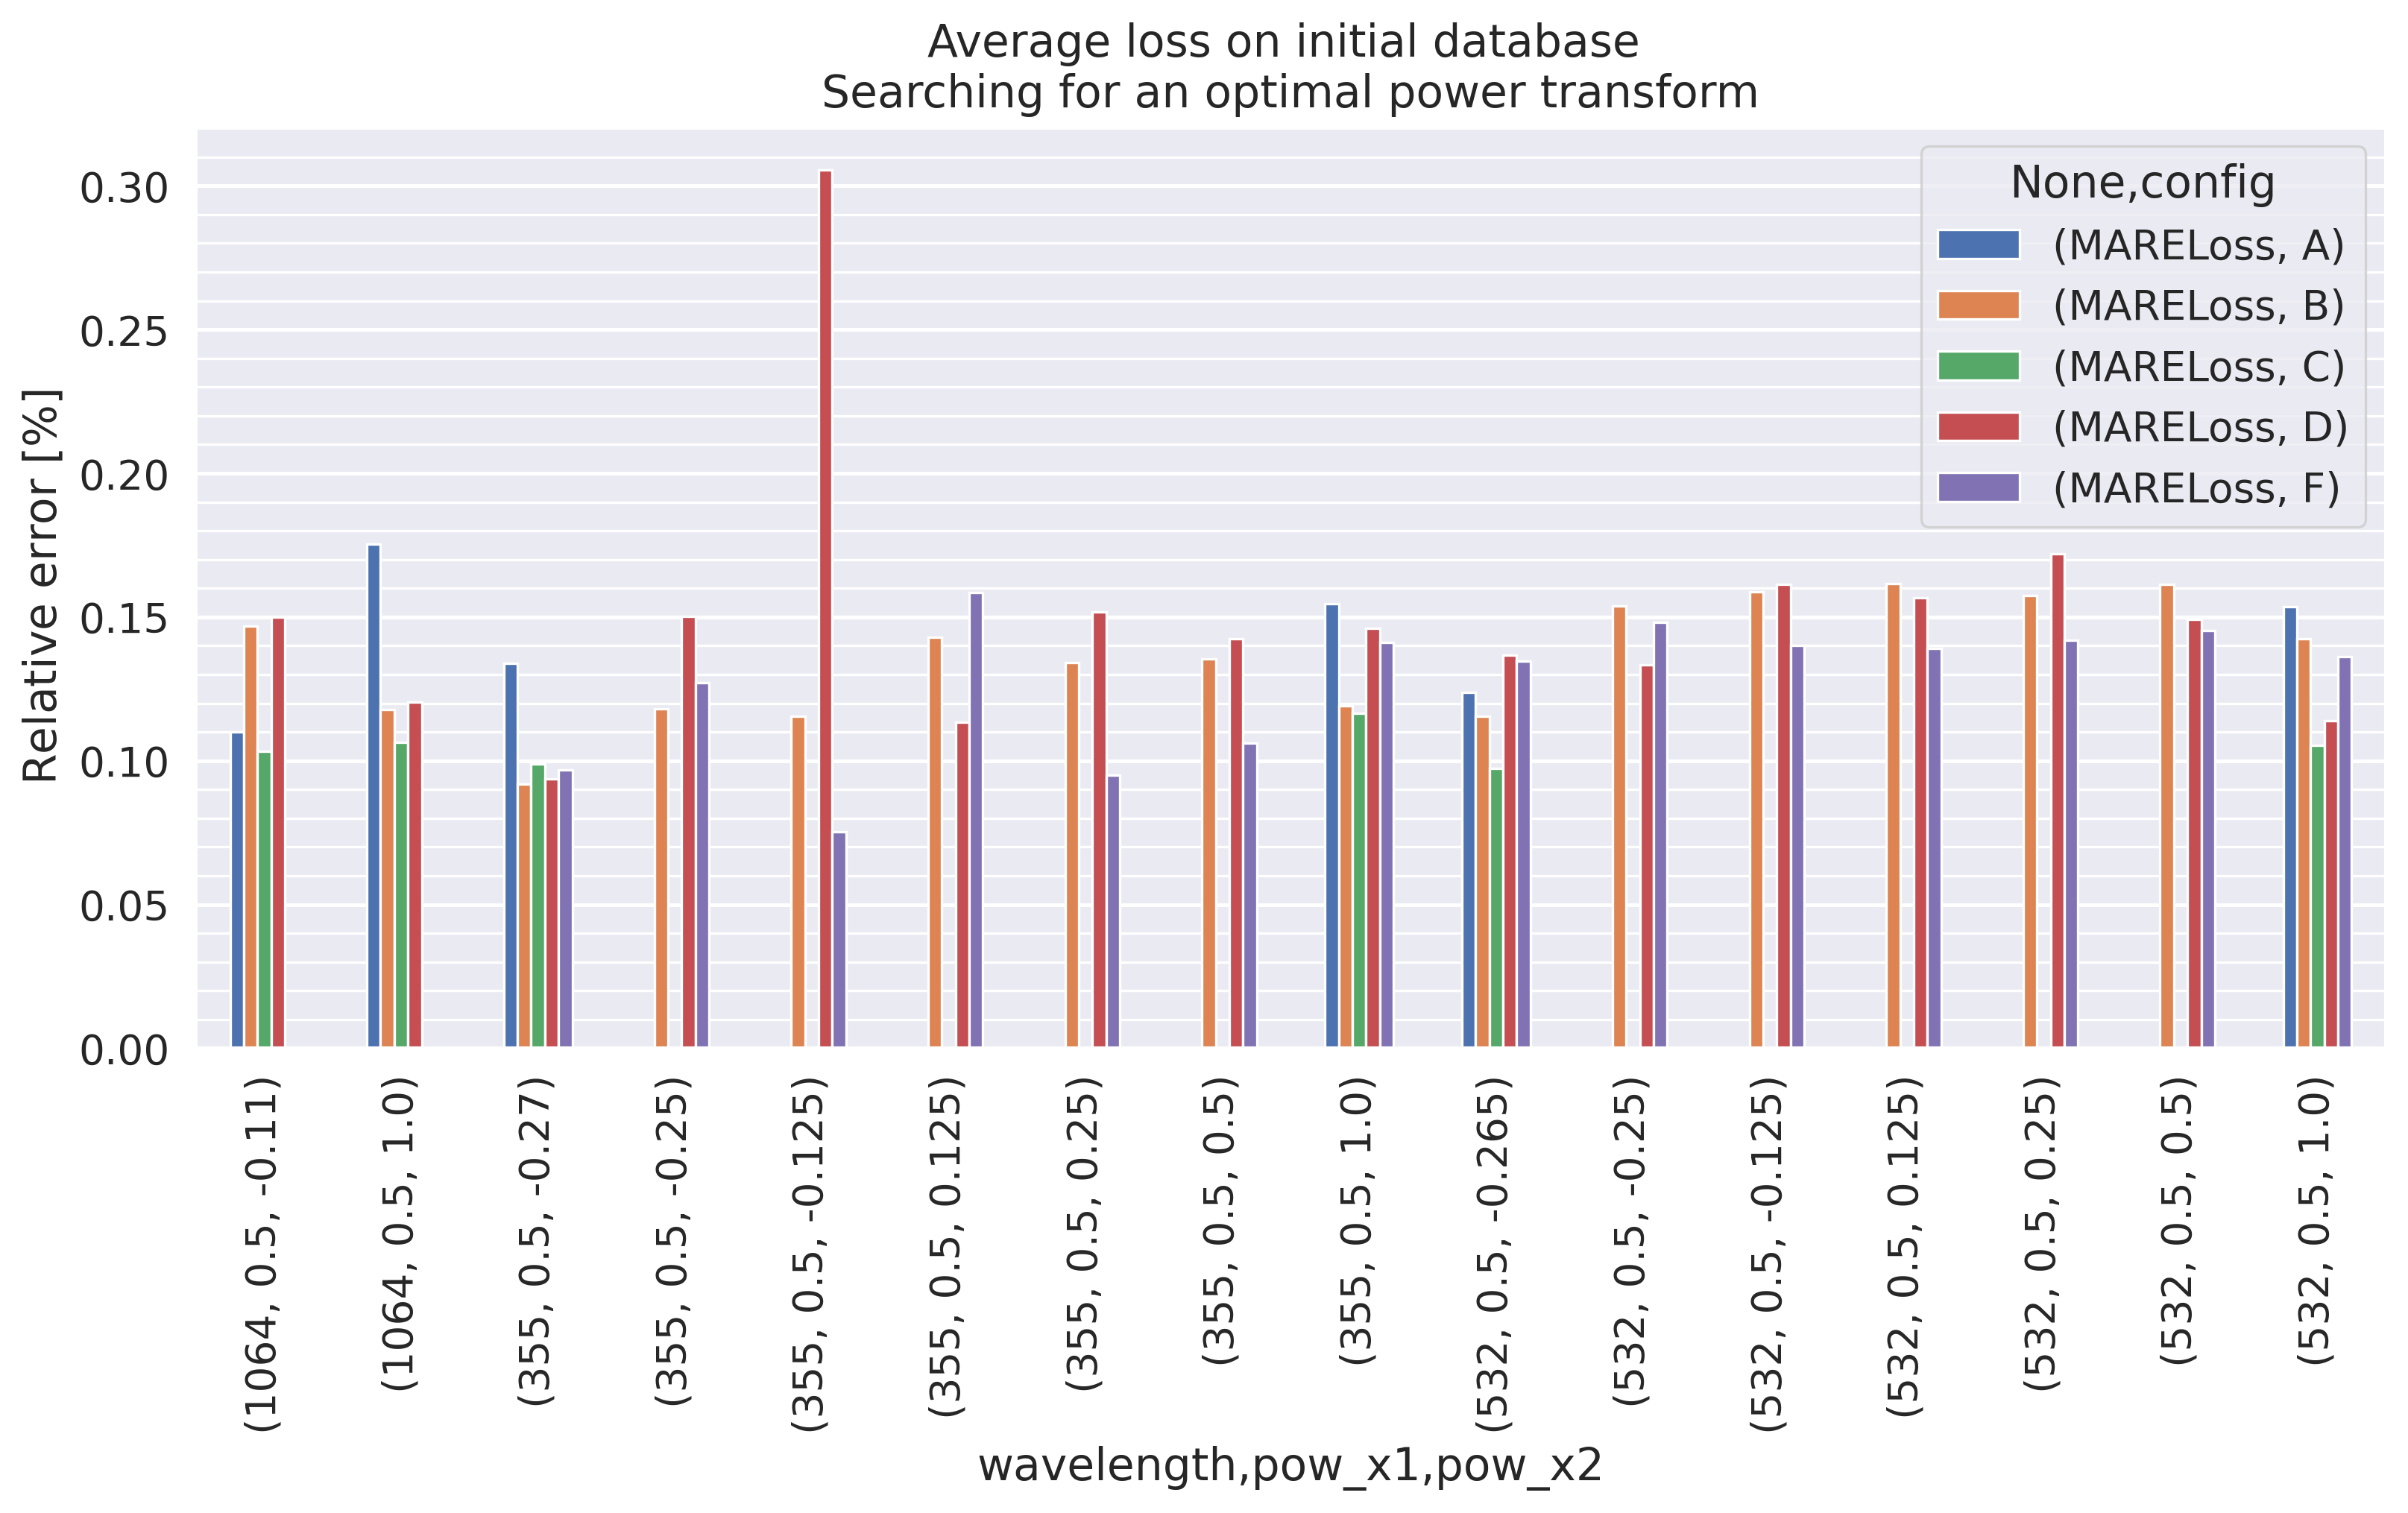

In [29]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='initial'][all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','pow_x1','pow_x2'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Average loss on initial database \n Searching for an optimal power transform ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\2062368894.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']


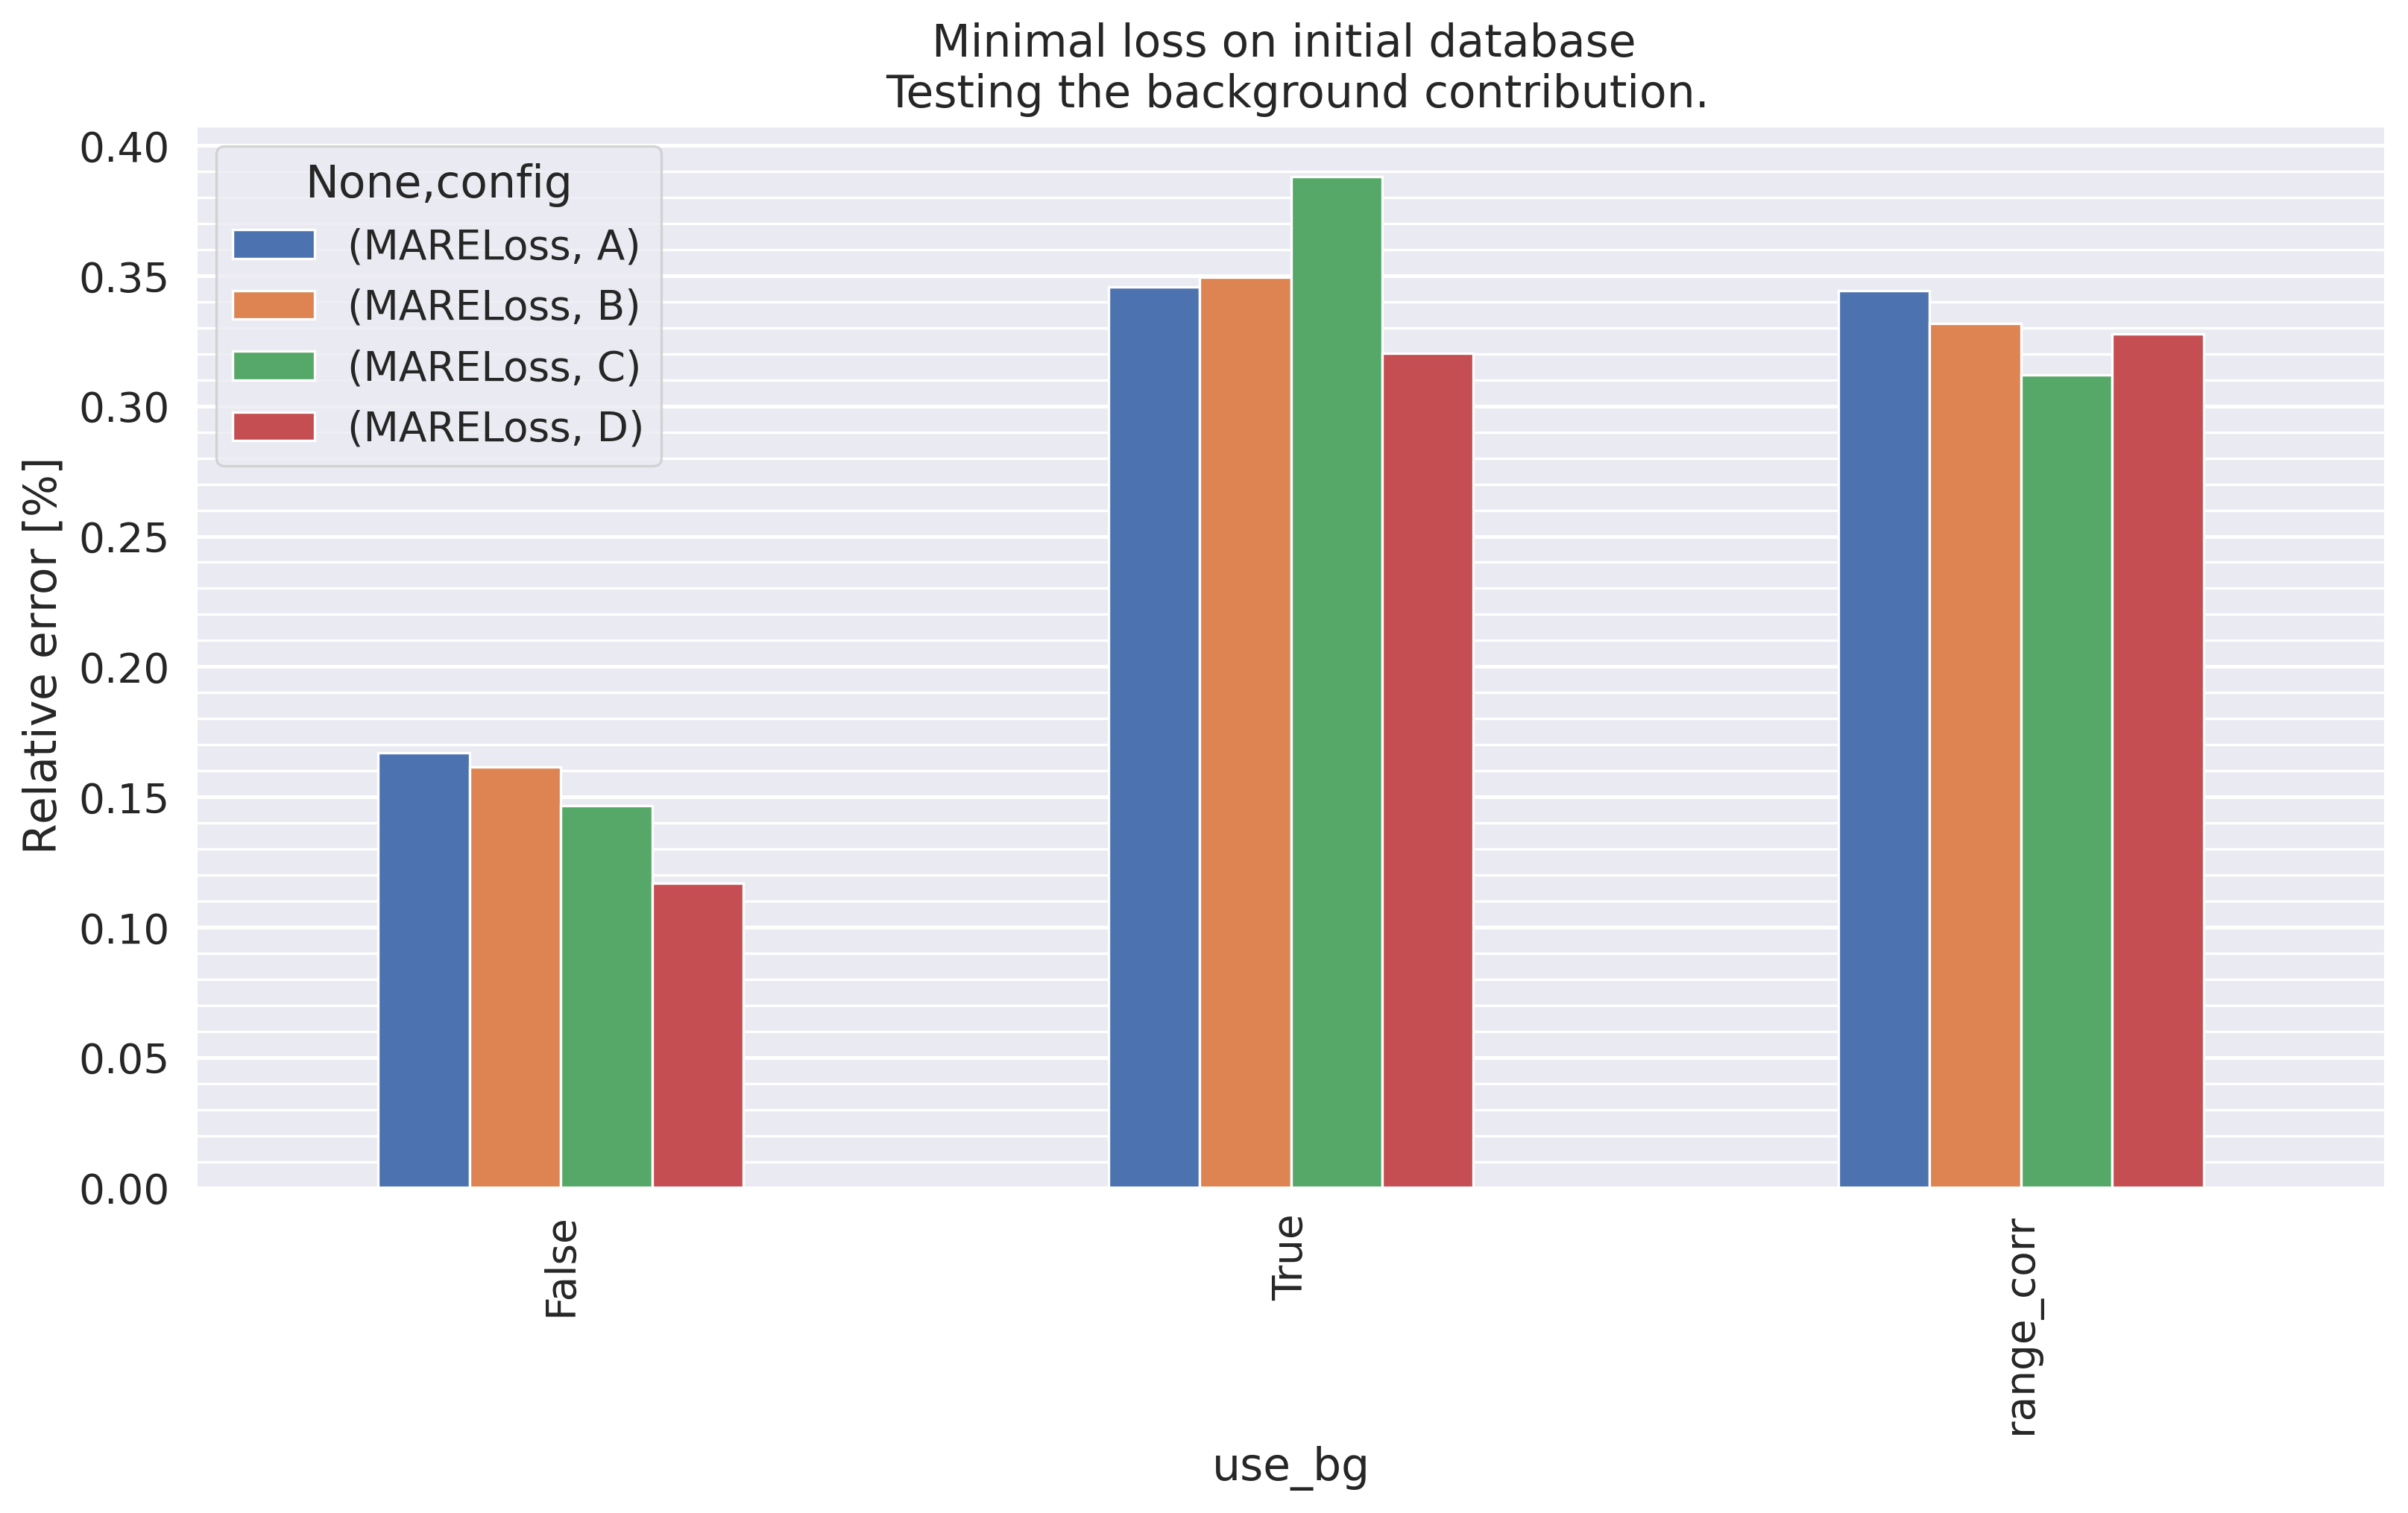

In [31]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7), #ylim= [0.0, 0.175],
                 title='Minimal loss on initial database \n Testing the background contribution.')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1739965833.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']


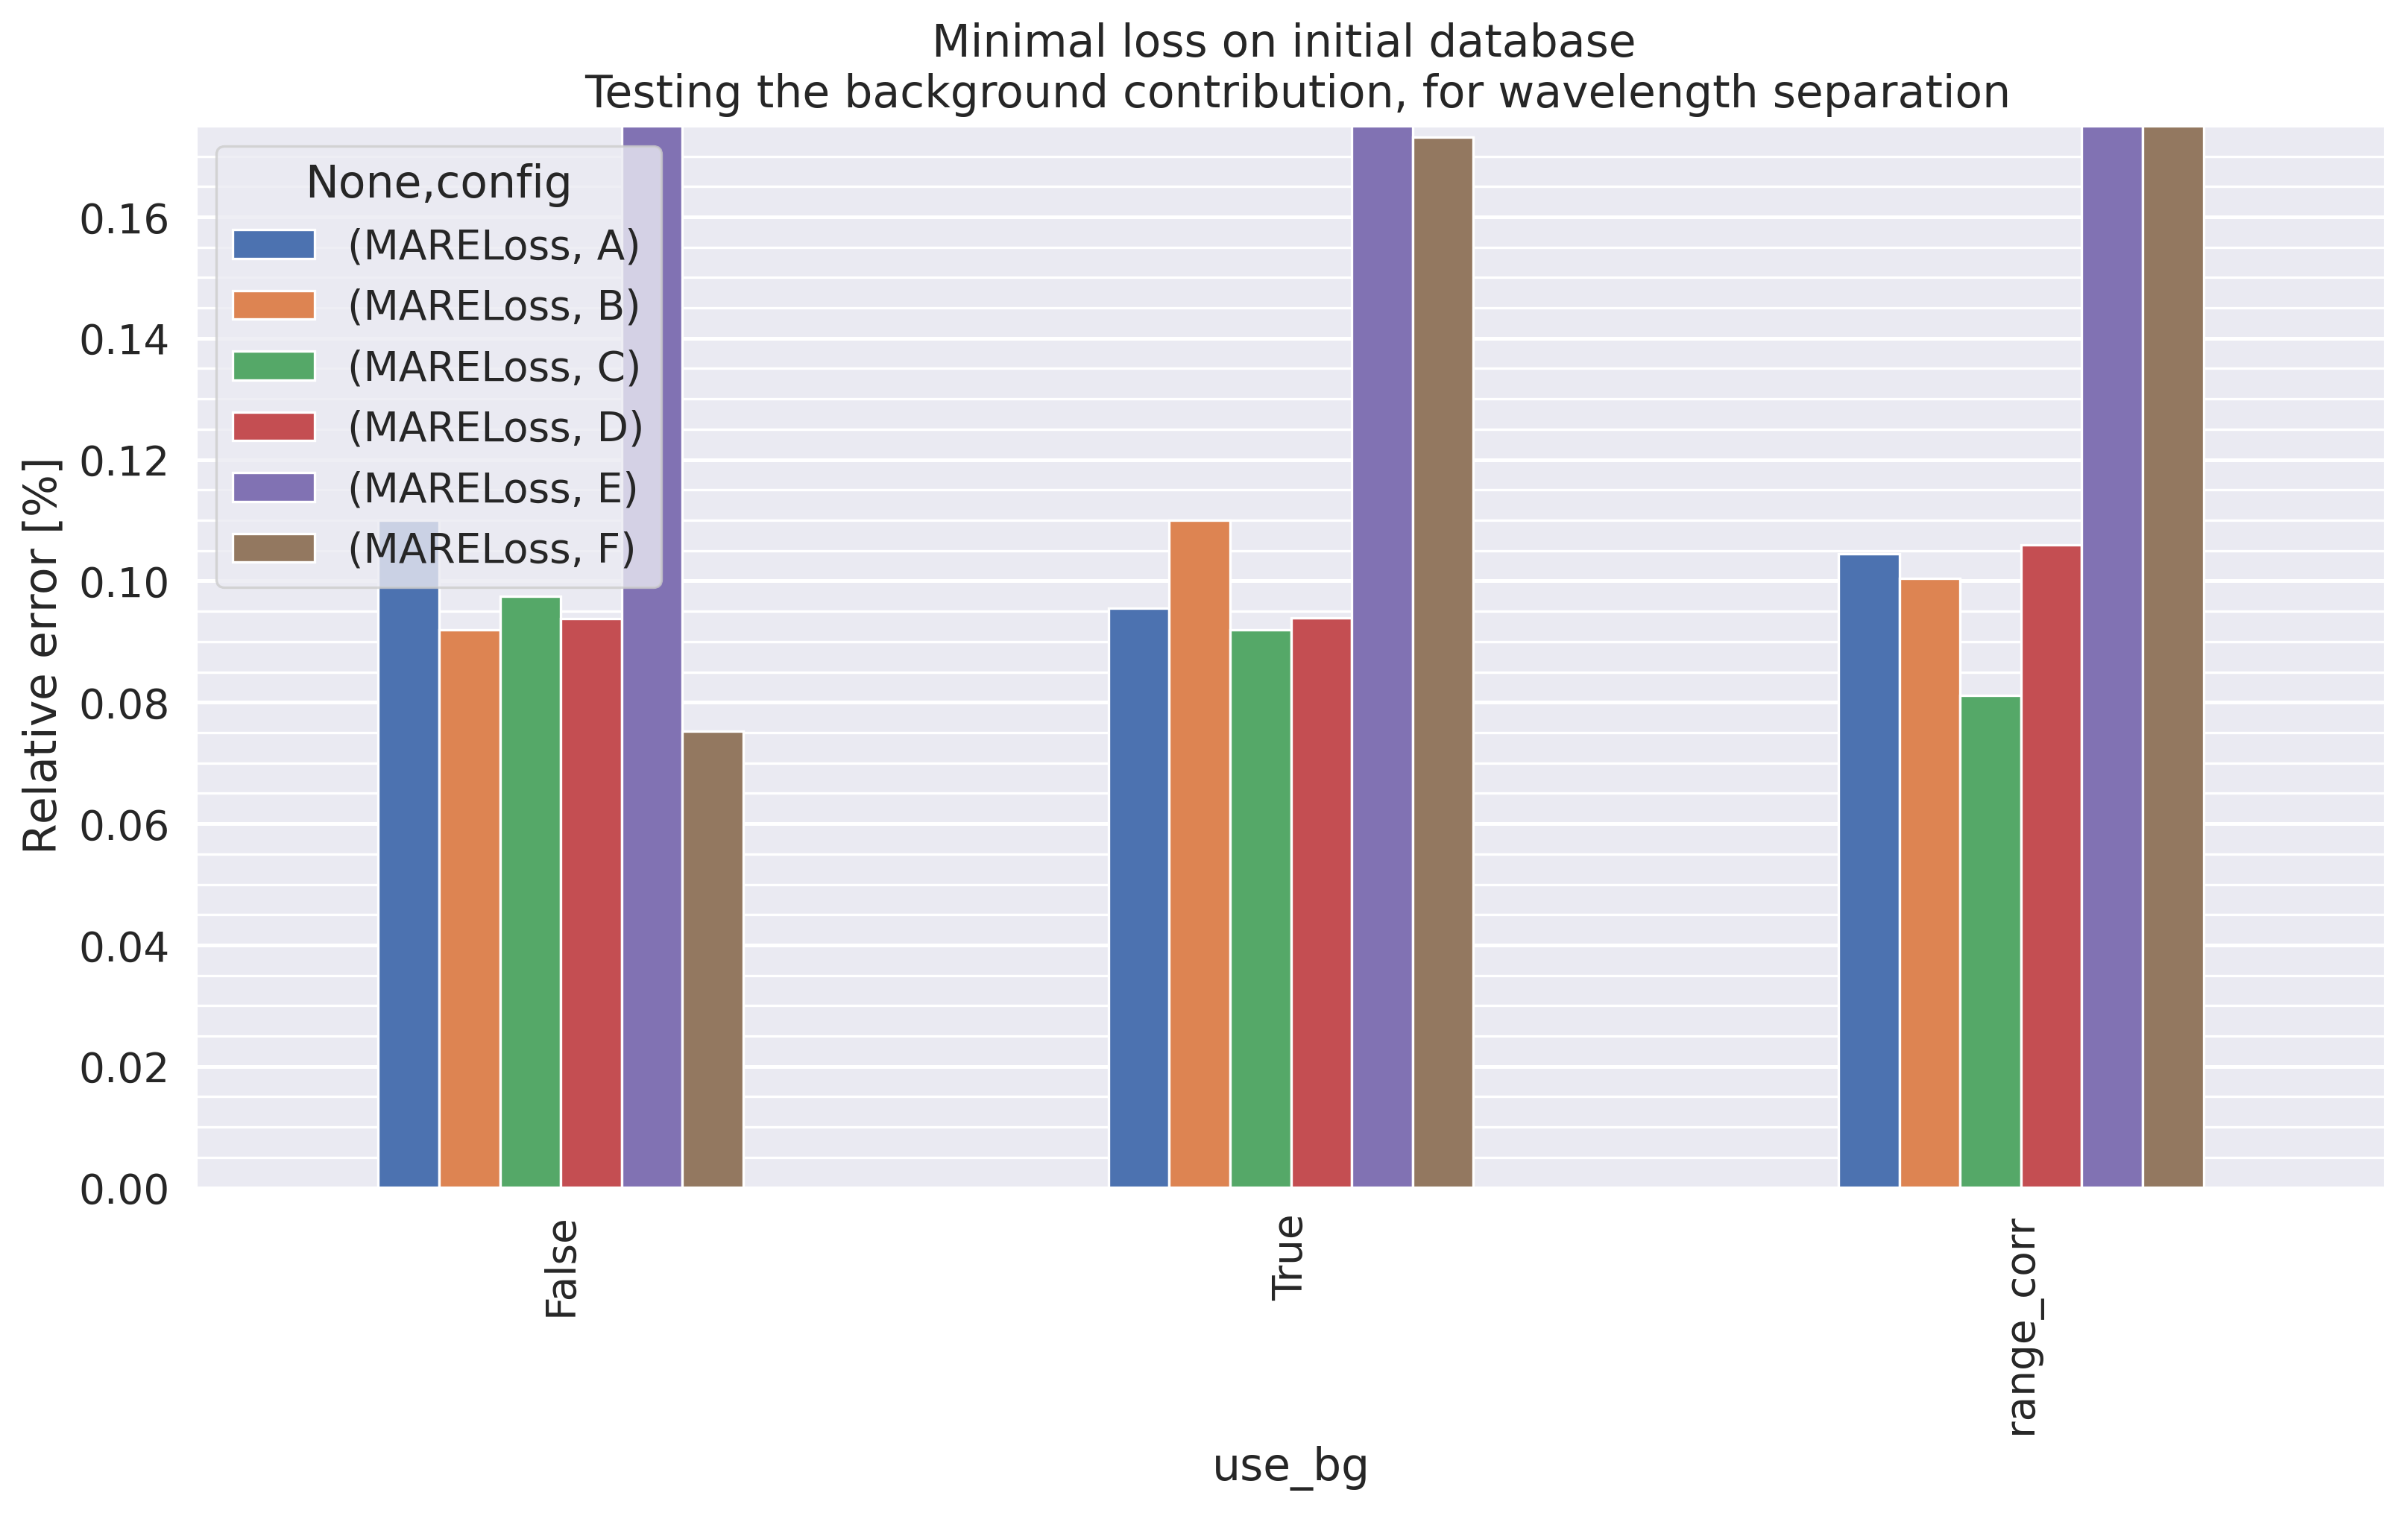

In [32]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7), ylim= [0.0, 0.175],
                 title='Minimal loss on initial database \n Testing the background contribution, for wavelength separation')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1798581564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']


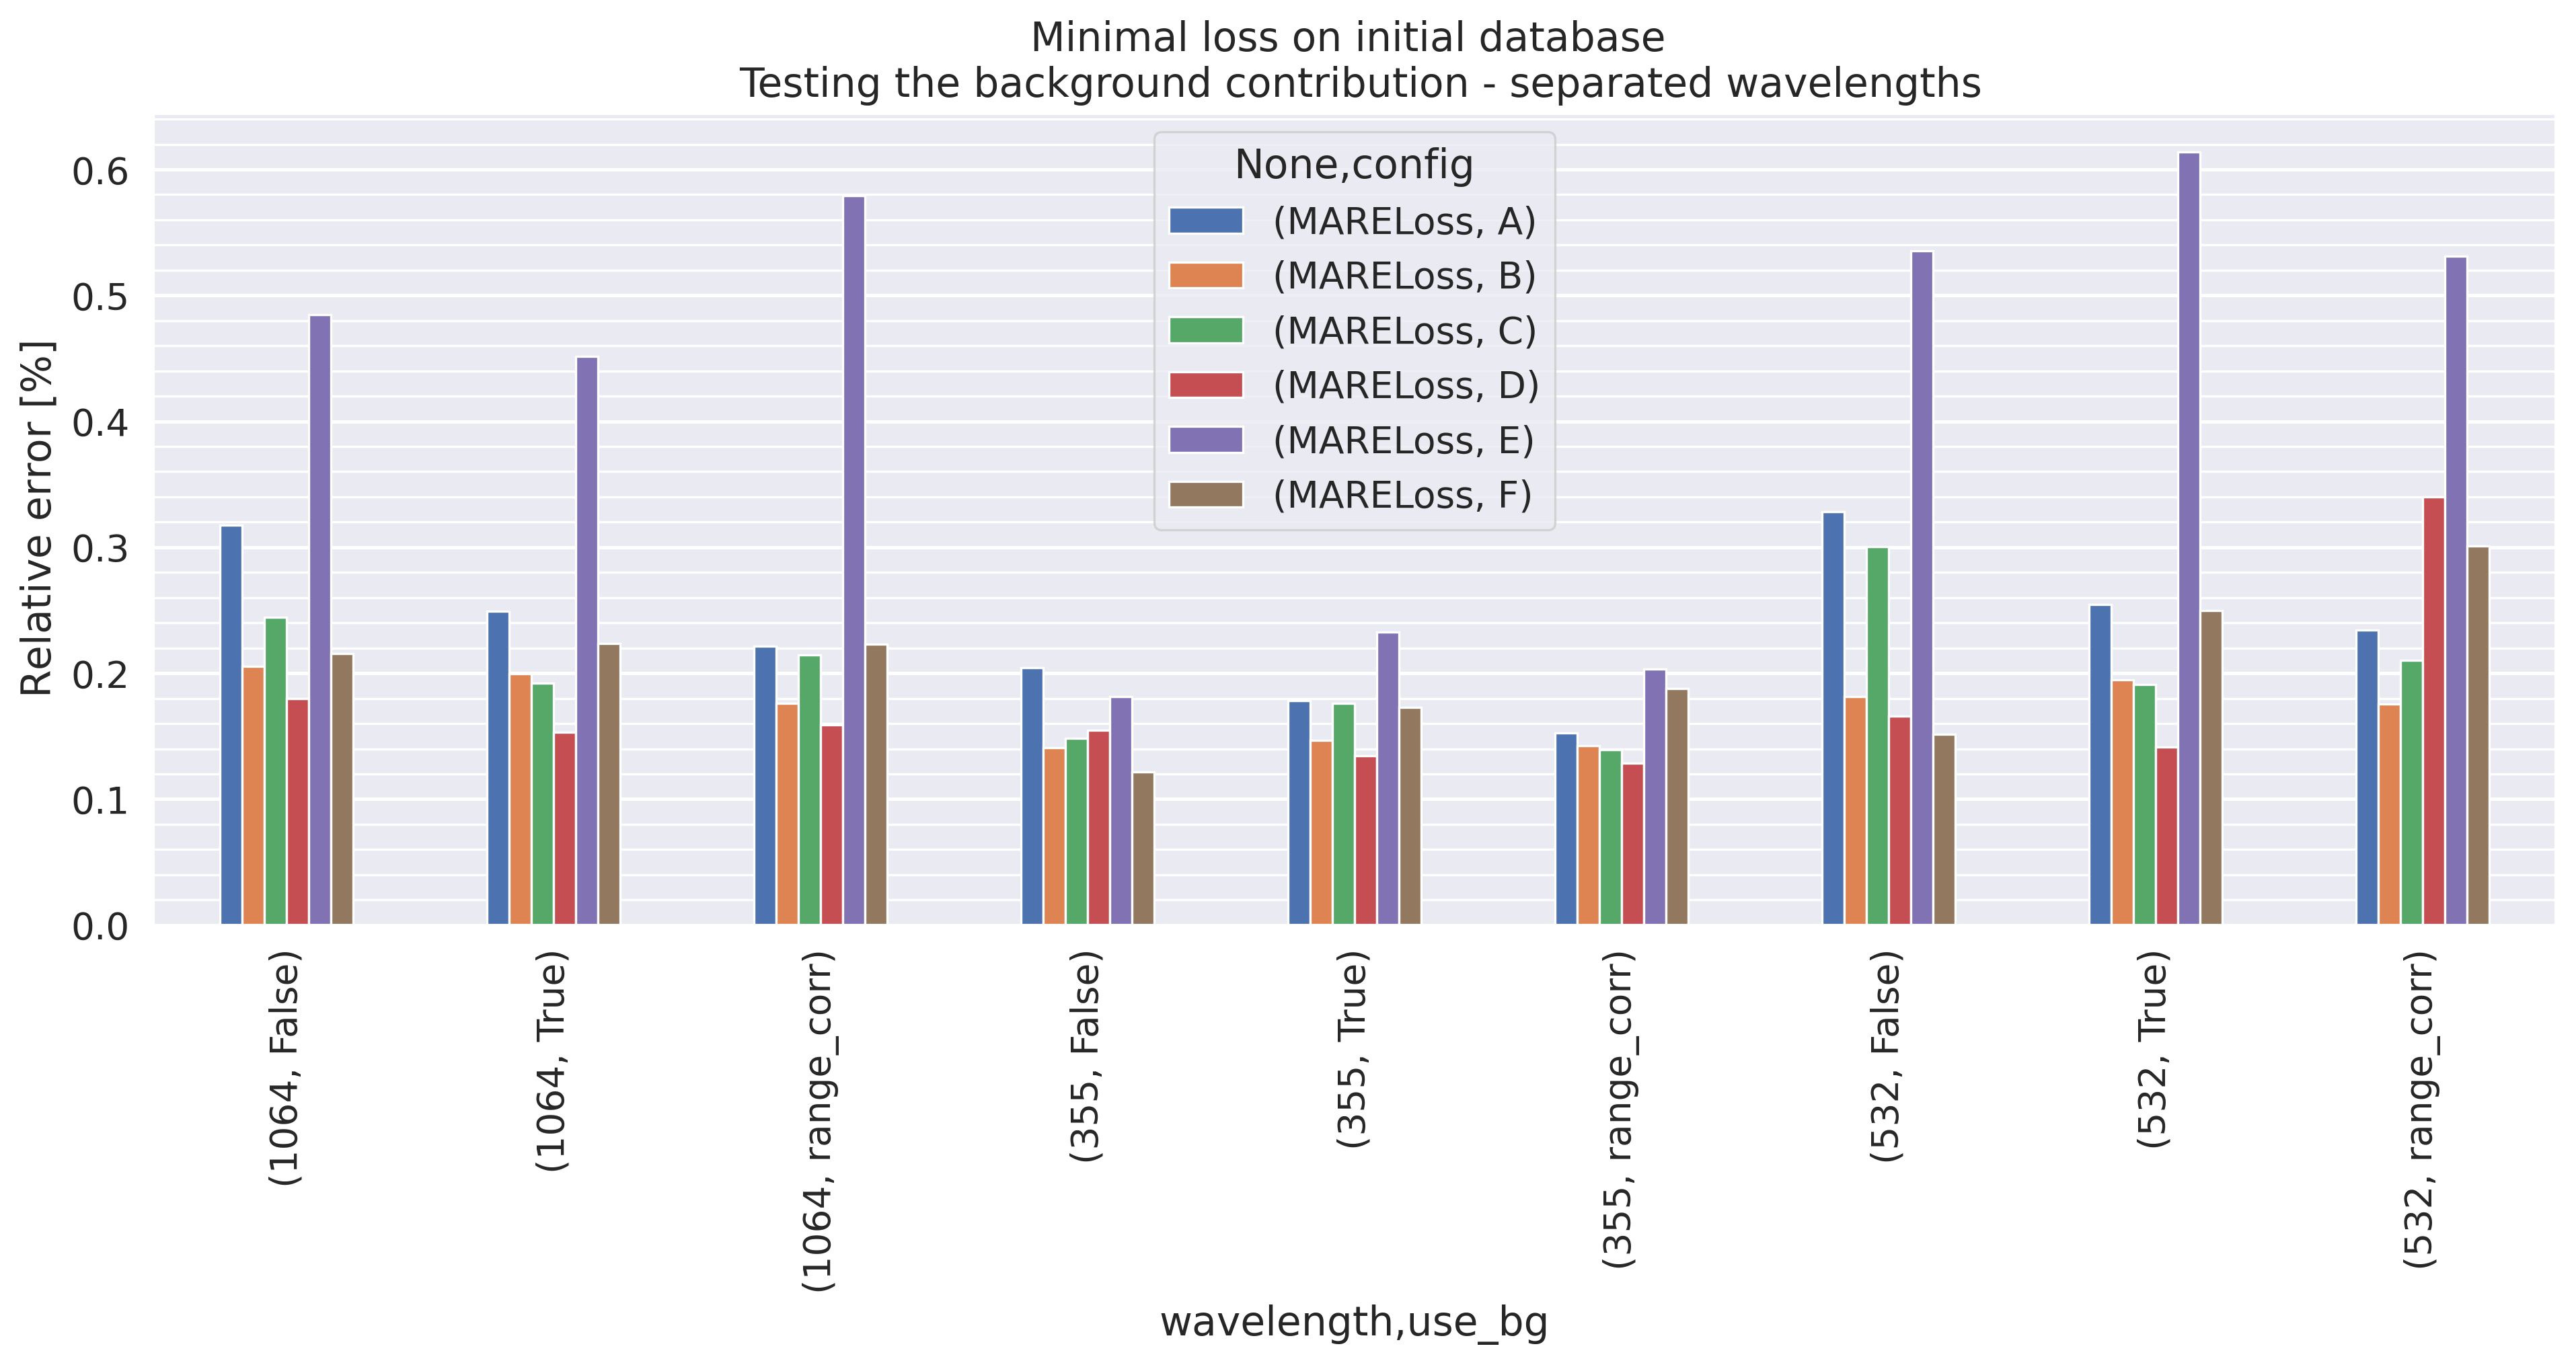

In [33]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','use_bg'],
               aggfunc=np.mean)

plot_pivot_table(p_table, figsize=(13, 7),
                 title='Minimal loss on initial database \n Testing the background contribution - separated wavelengths')


In [34]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'pow_x2','pow_x3'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 7), ylim= [0.0, 0.2],
                     title=f'Minimal loss on initial database \n'+
                           fr'Testing the background contribution - ${wavelength}[\rm nm]$')

No results to display!
No results to display!
No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1902098380.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1902098380.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\1902098380.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\920632273.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]


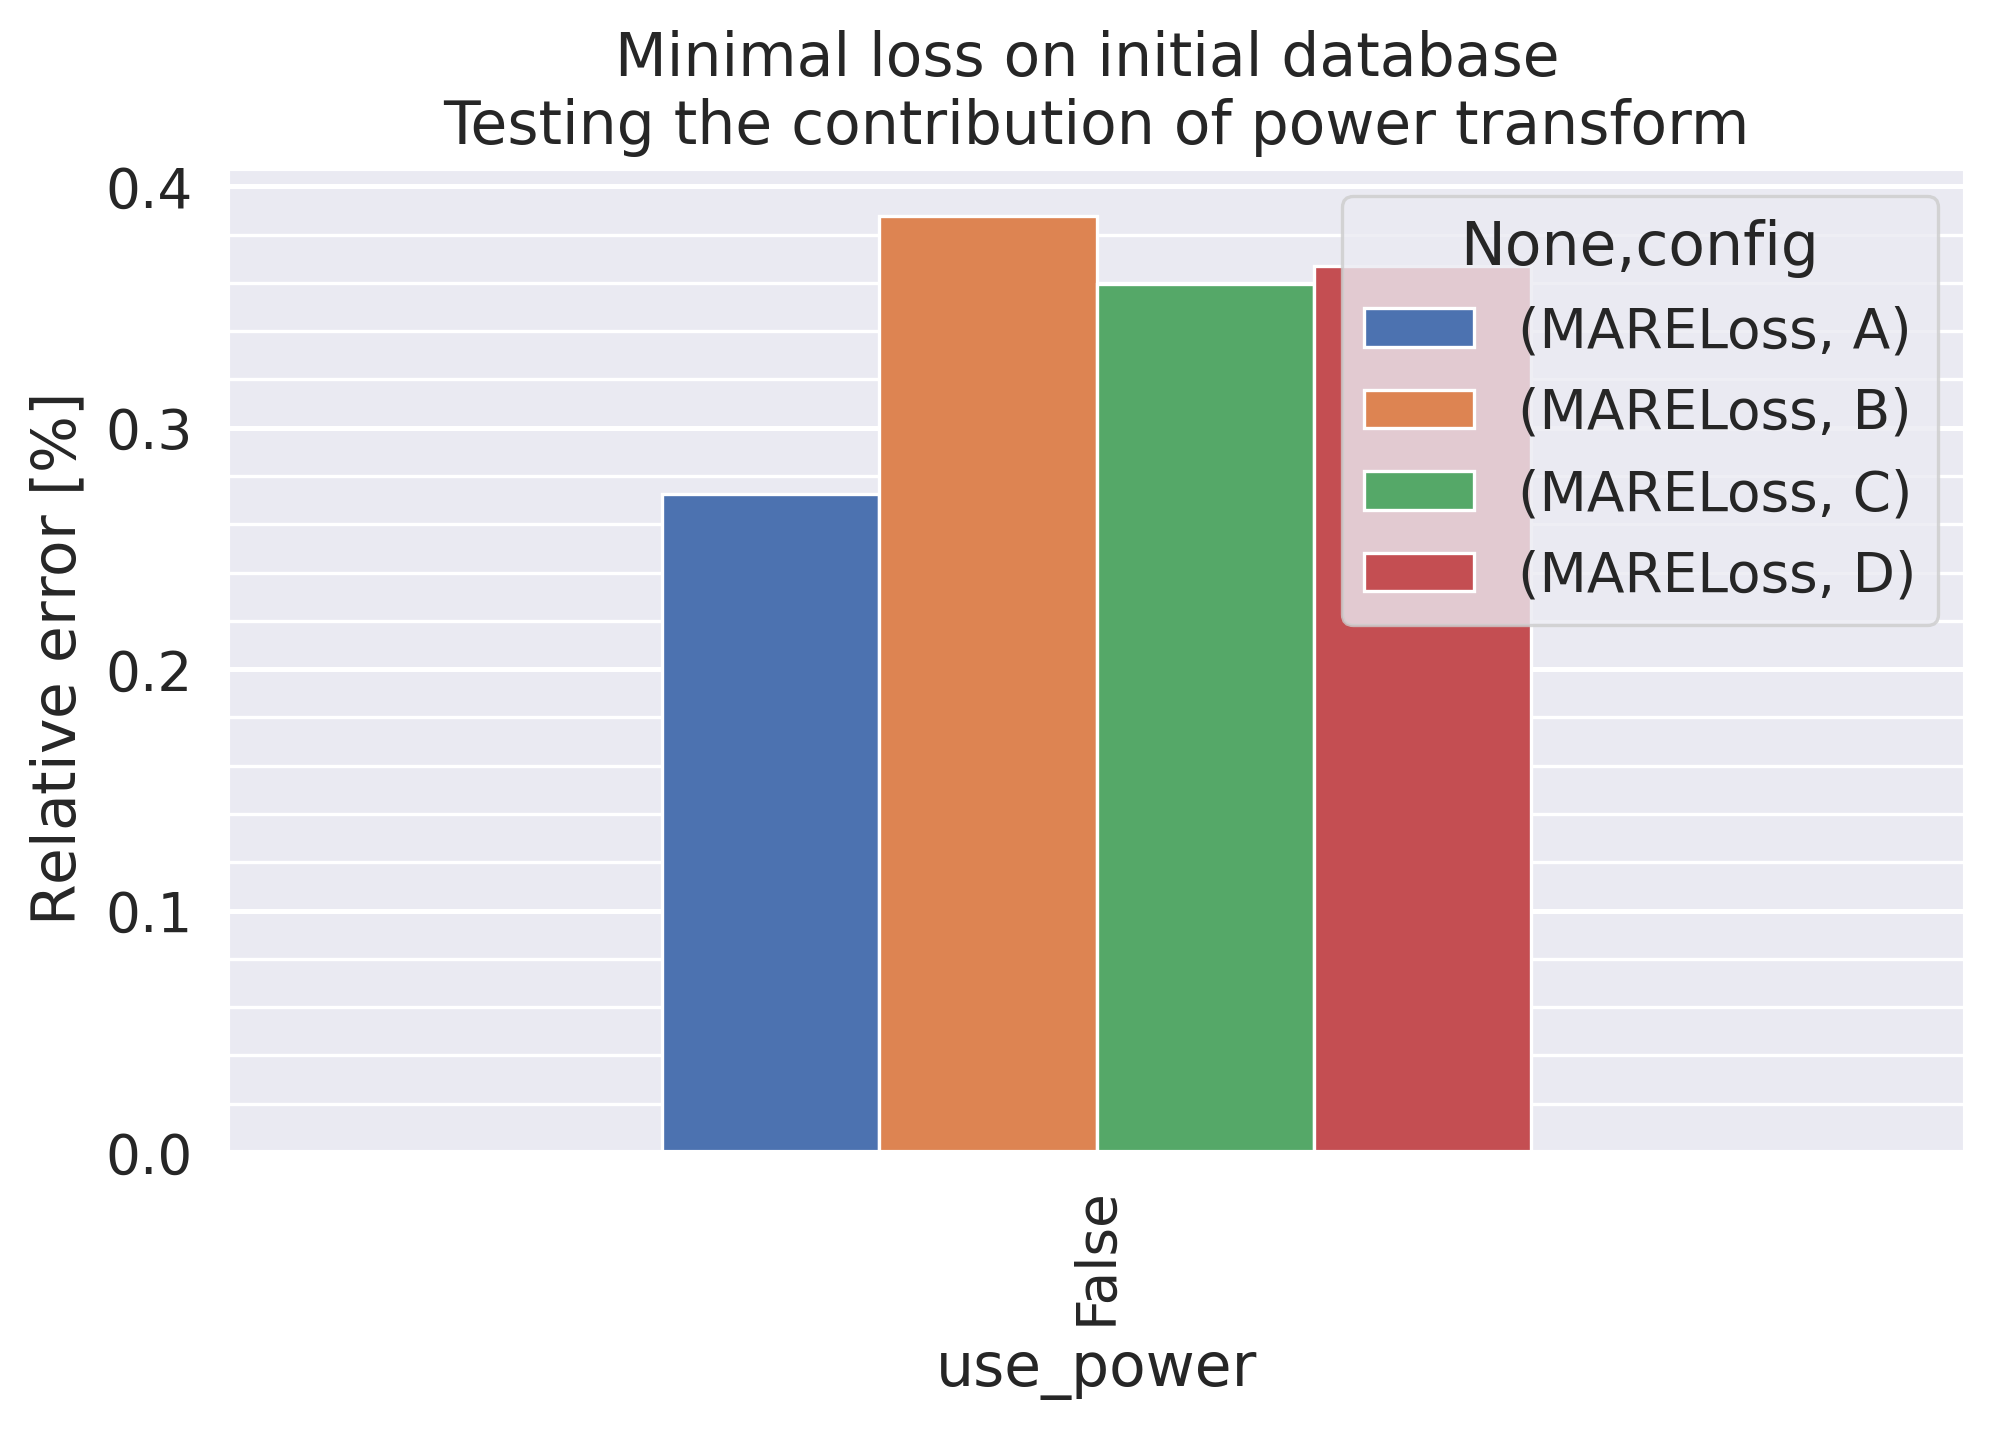

In [35]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
               [all_wavs_configABCD.use_bg!='range_corr']
               [all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on initial database \n Testing the contribution of power transform ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\174102017.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


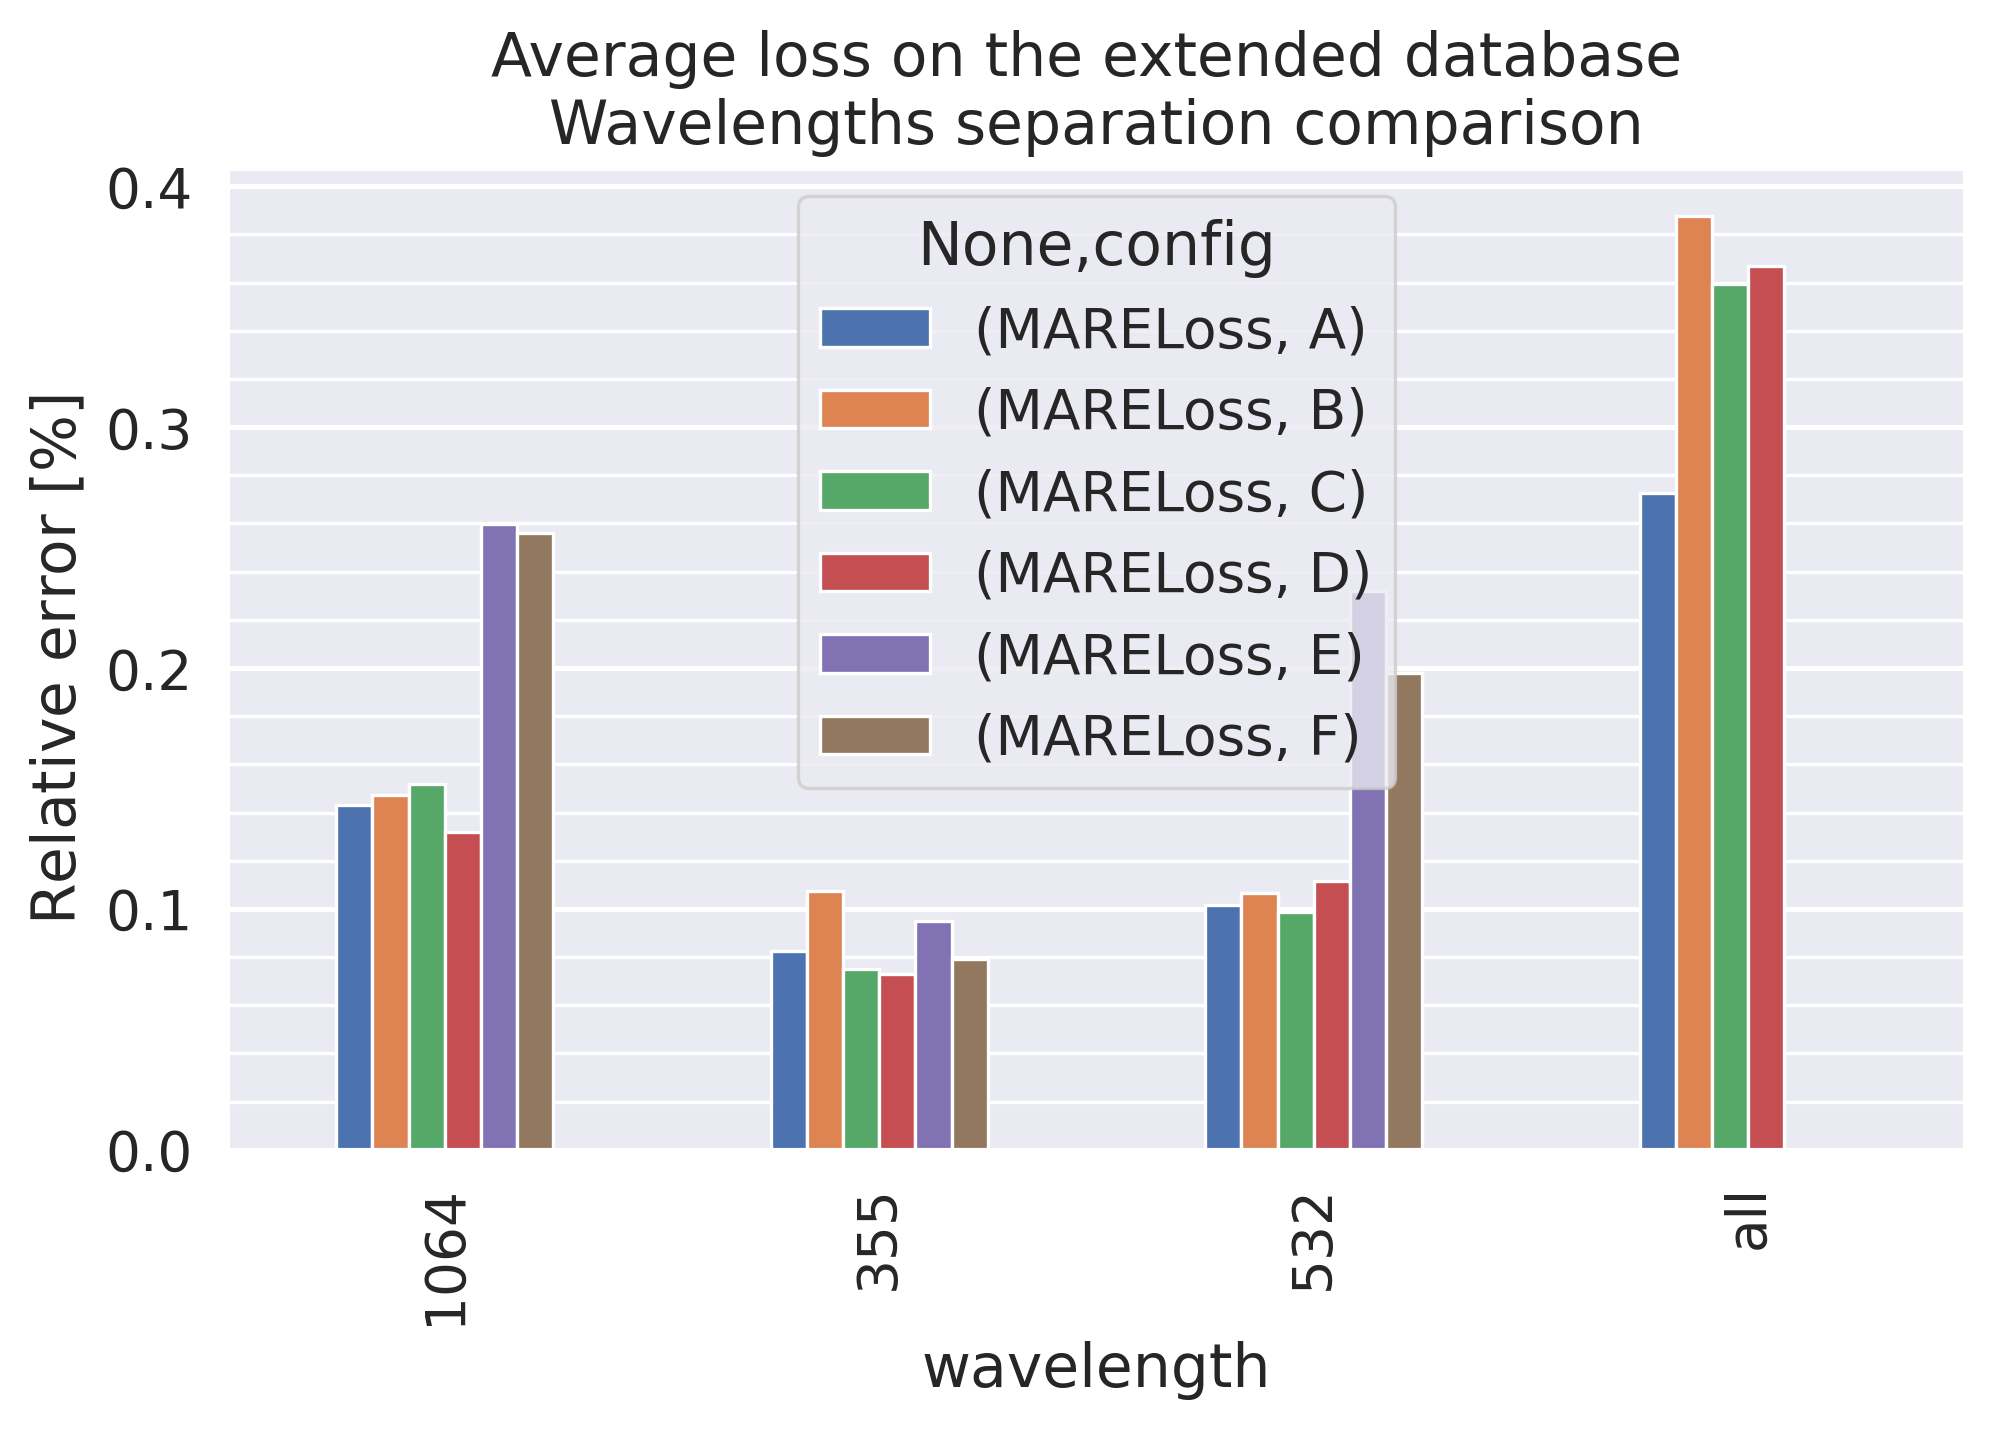

In [36]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on the extended database \n Wavelengths separation comparison ')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\2517525542.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


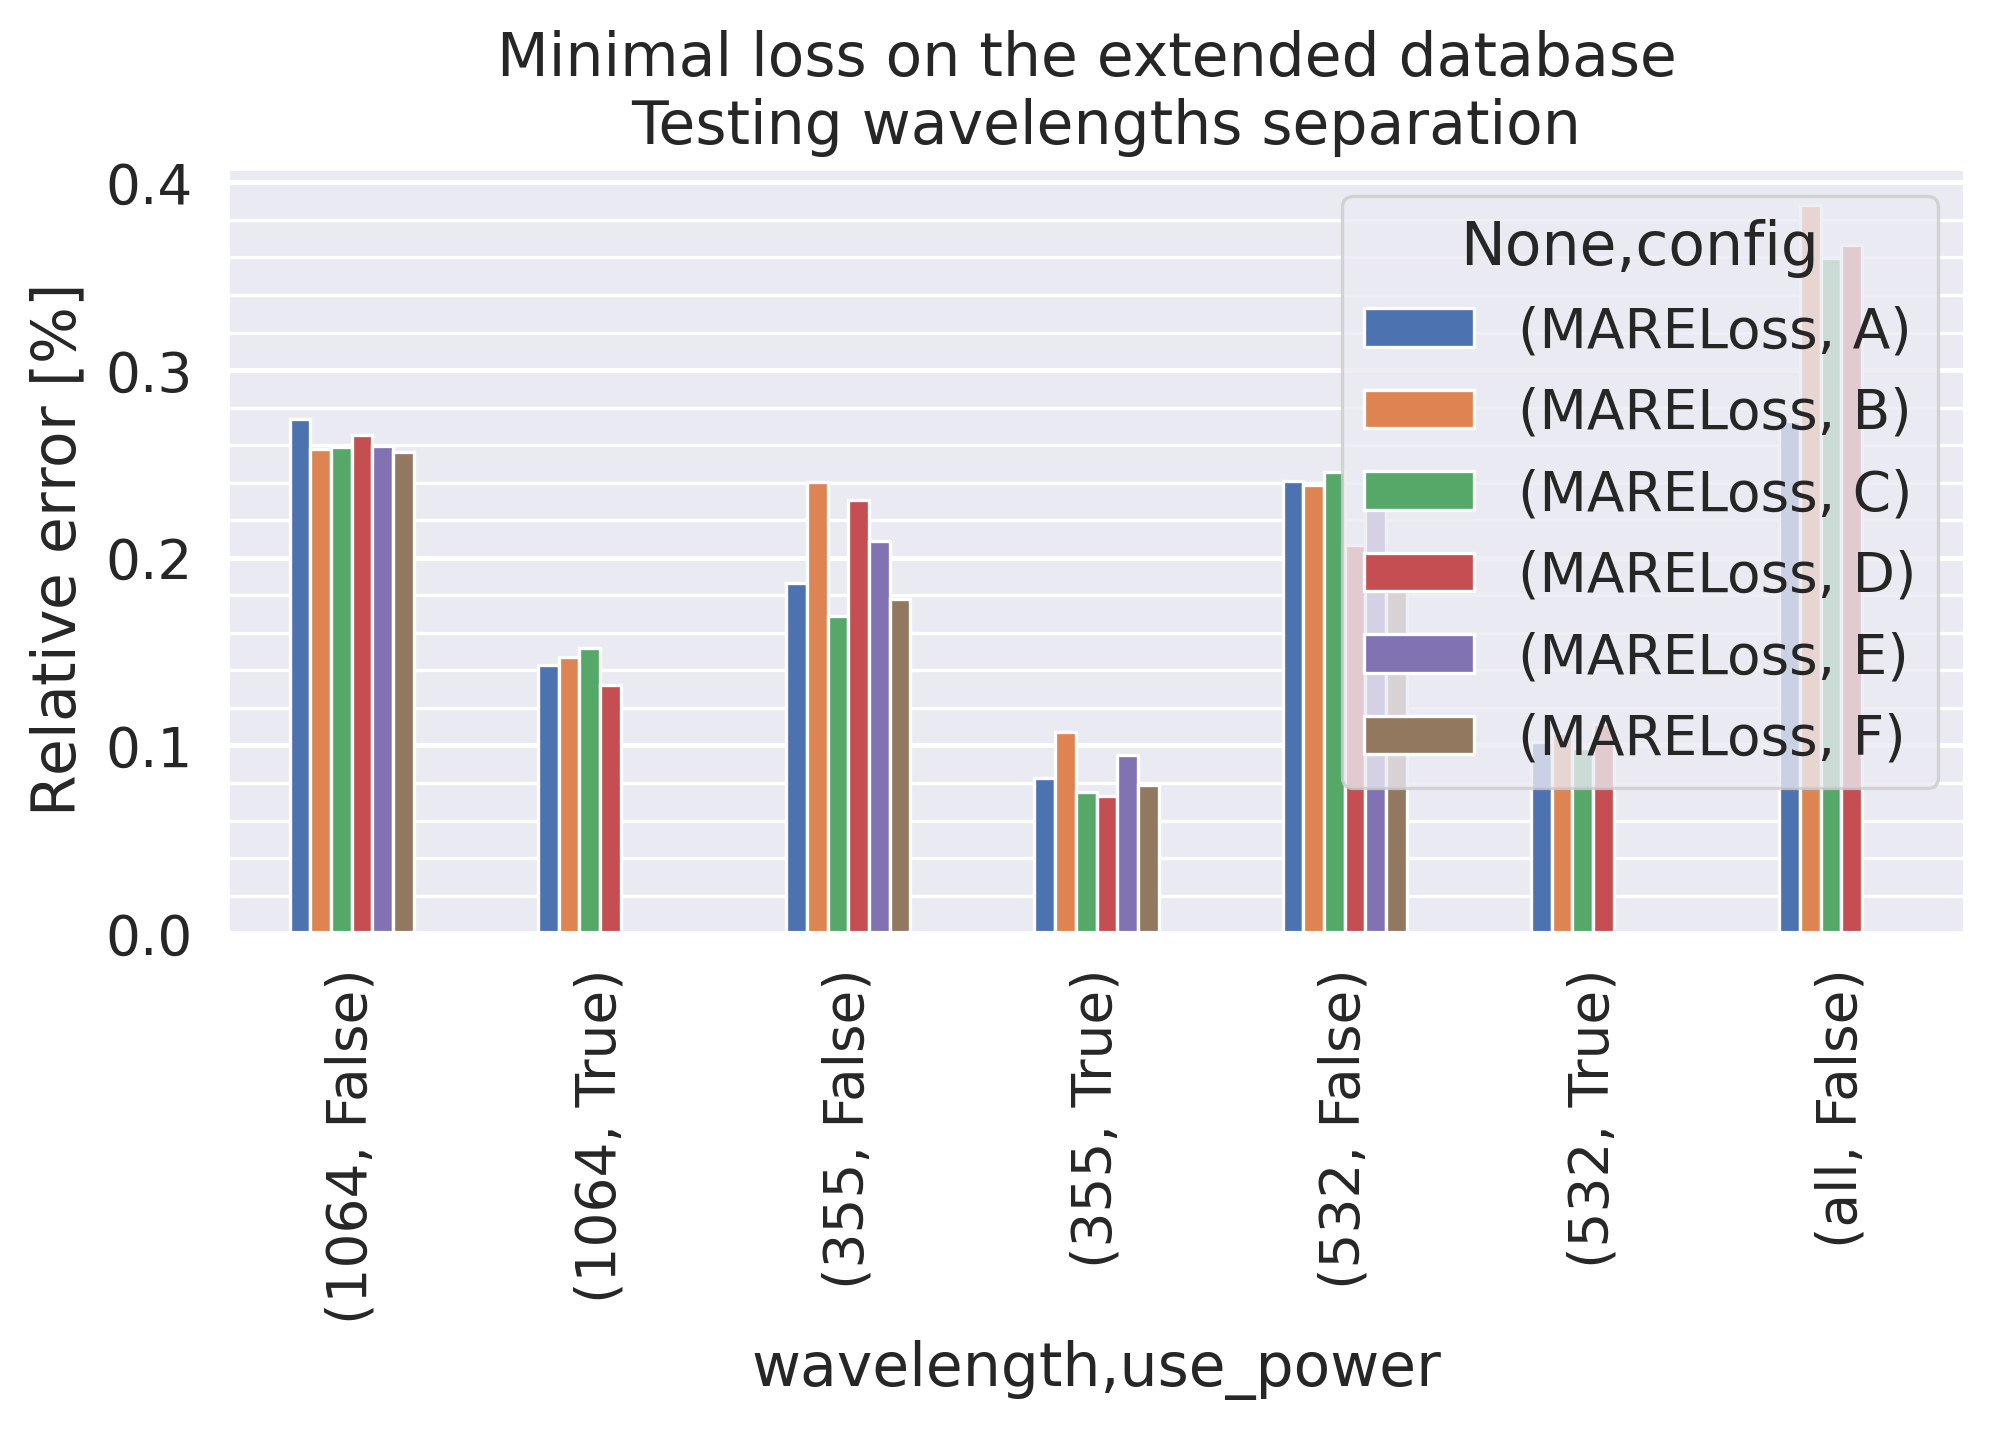

In [37]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on the extended database \n Testing wavelengths separation')

C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\3289709638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


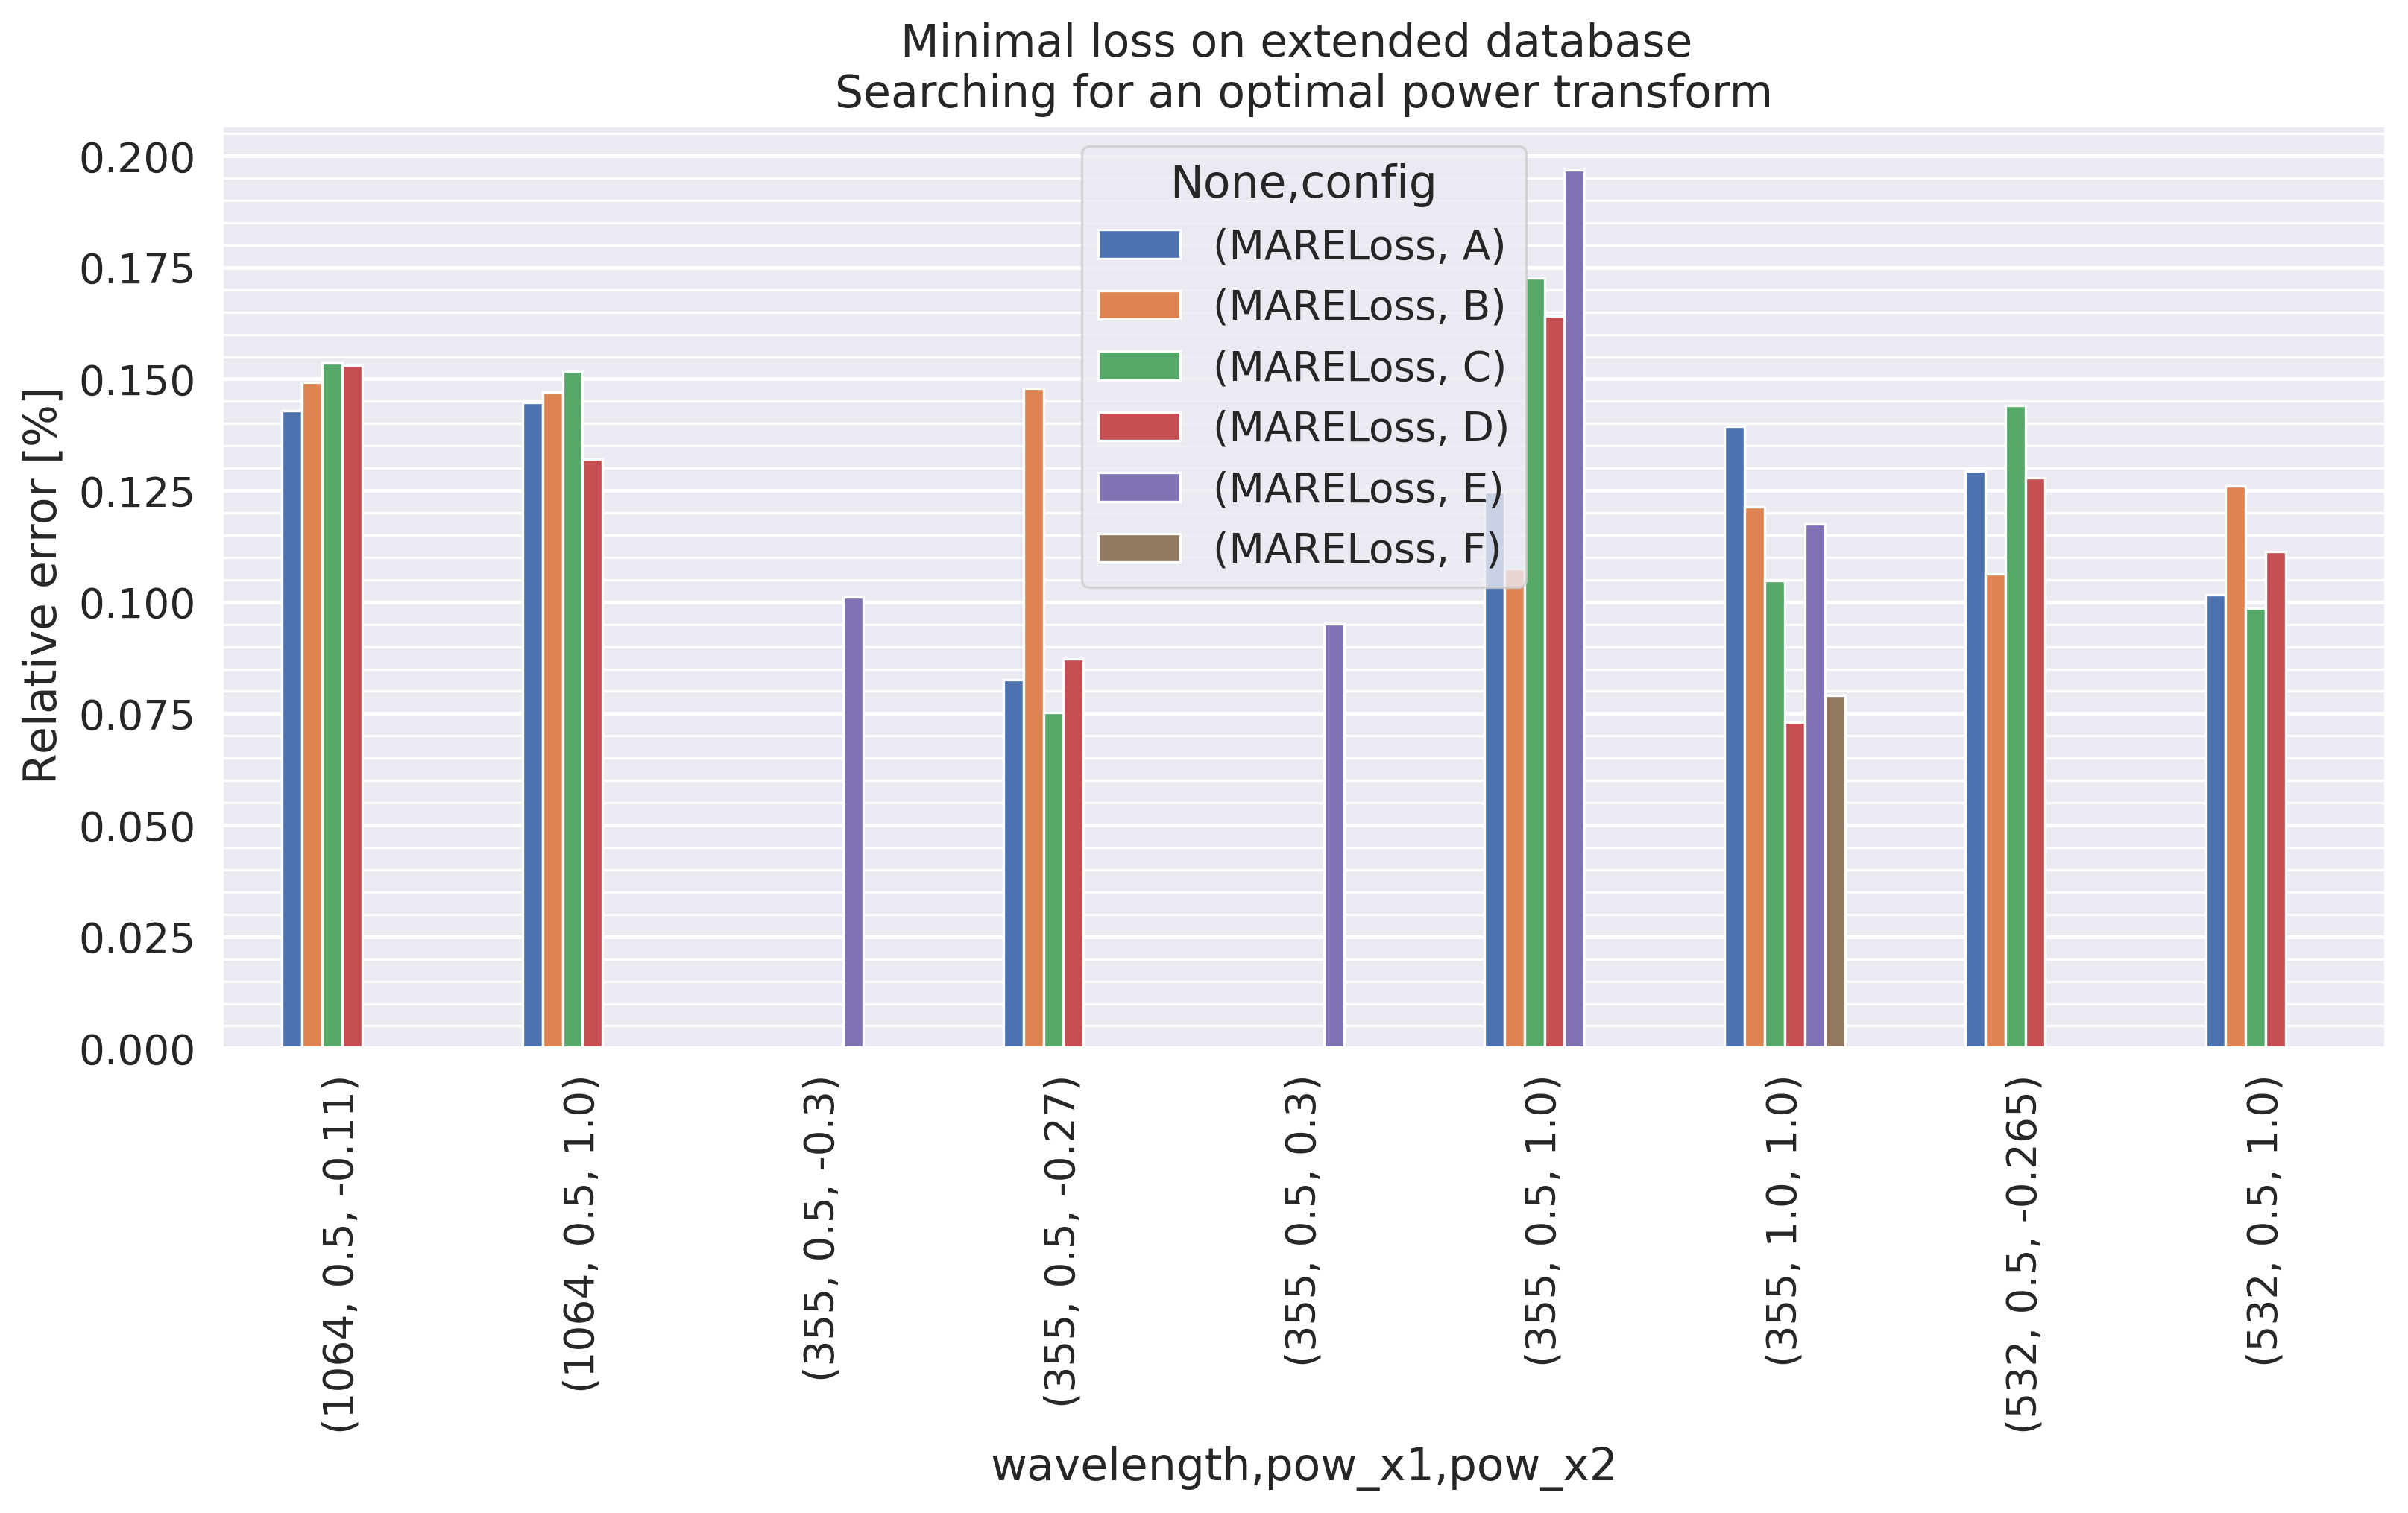

In [38]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','pow_x1','pow_x2'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Minimal loss on extended database \n Searching for an optimal power transform ')

In [39]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['pow_x1','pow_x2','db'],
                   aggfunc=np.mean)

    plot_pivot_table(p_table, figsize=(11, 9),
                     title=f'Minimal loss on extended database \n Testing 1st model - '+
                           fr'${wavelength}[\rm nm]$' )

No results to display!
No results to display!
No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\447757422.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='extended']


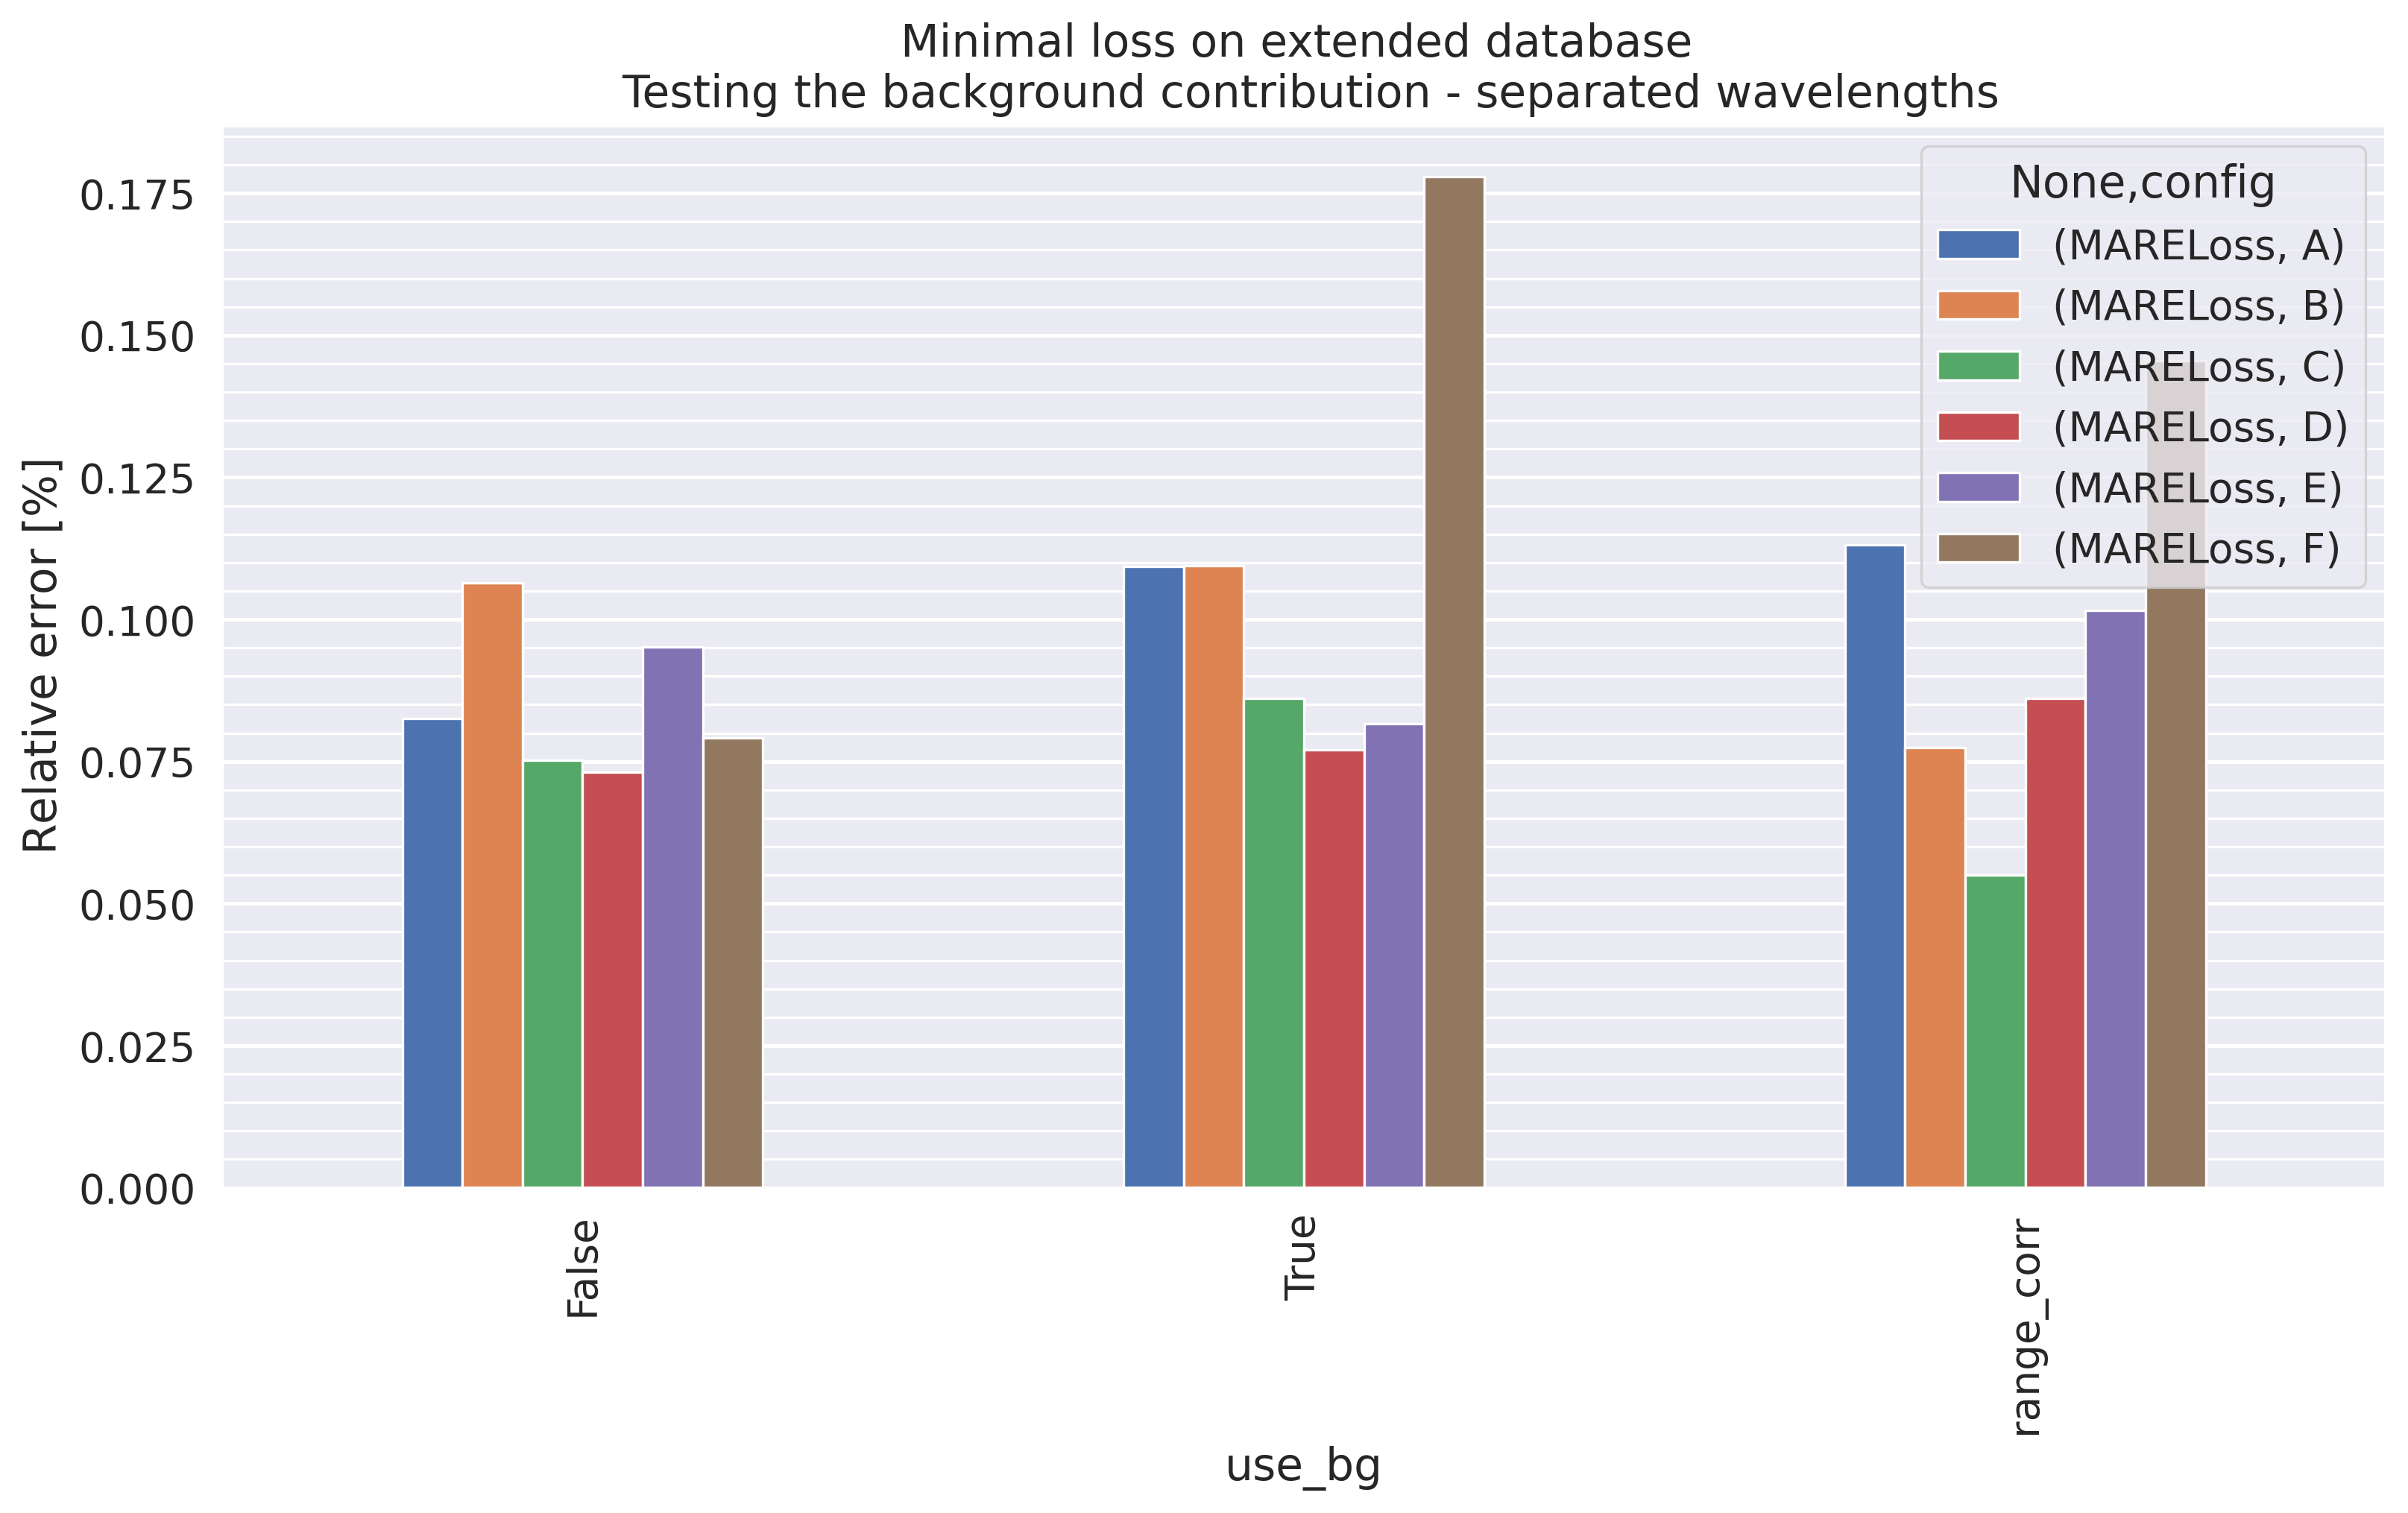

In [40]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Minimal loss on extended database \n Testing the background contribution - separated wavelengths')

In [41]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
                   [all_wavs_configABCD.wavelength==wavelength],#[all_wavs_configABCD.db!='initial_db_overlap'],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'db'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 9), ylim= [0.0, 0.2],
                     title=f'Minimal loss on extended database \n Testing 2nd model - '+
                           fr'${wavelength}[\rm nm]$' )
    

No results to display!
No results to display!
No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]


In [42]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'pow_x2','pow_x3'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 7), ylim= [0.0, 0.2],
                     title=f'Minimal loss on extended database \n'+
                           fr'Testing the background contribution - ${wavelength}[\rm nm]$')

No results to display!
No results to display!
No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_7744\415540291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power==False]


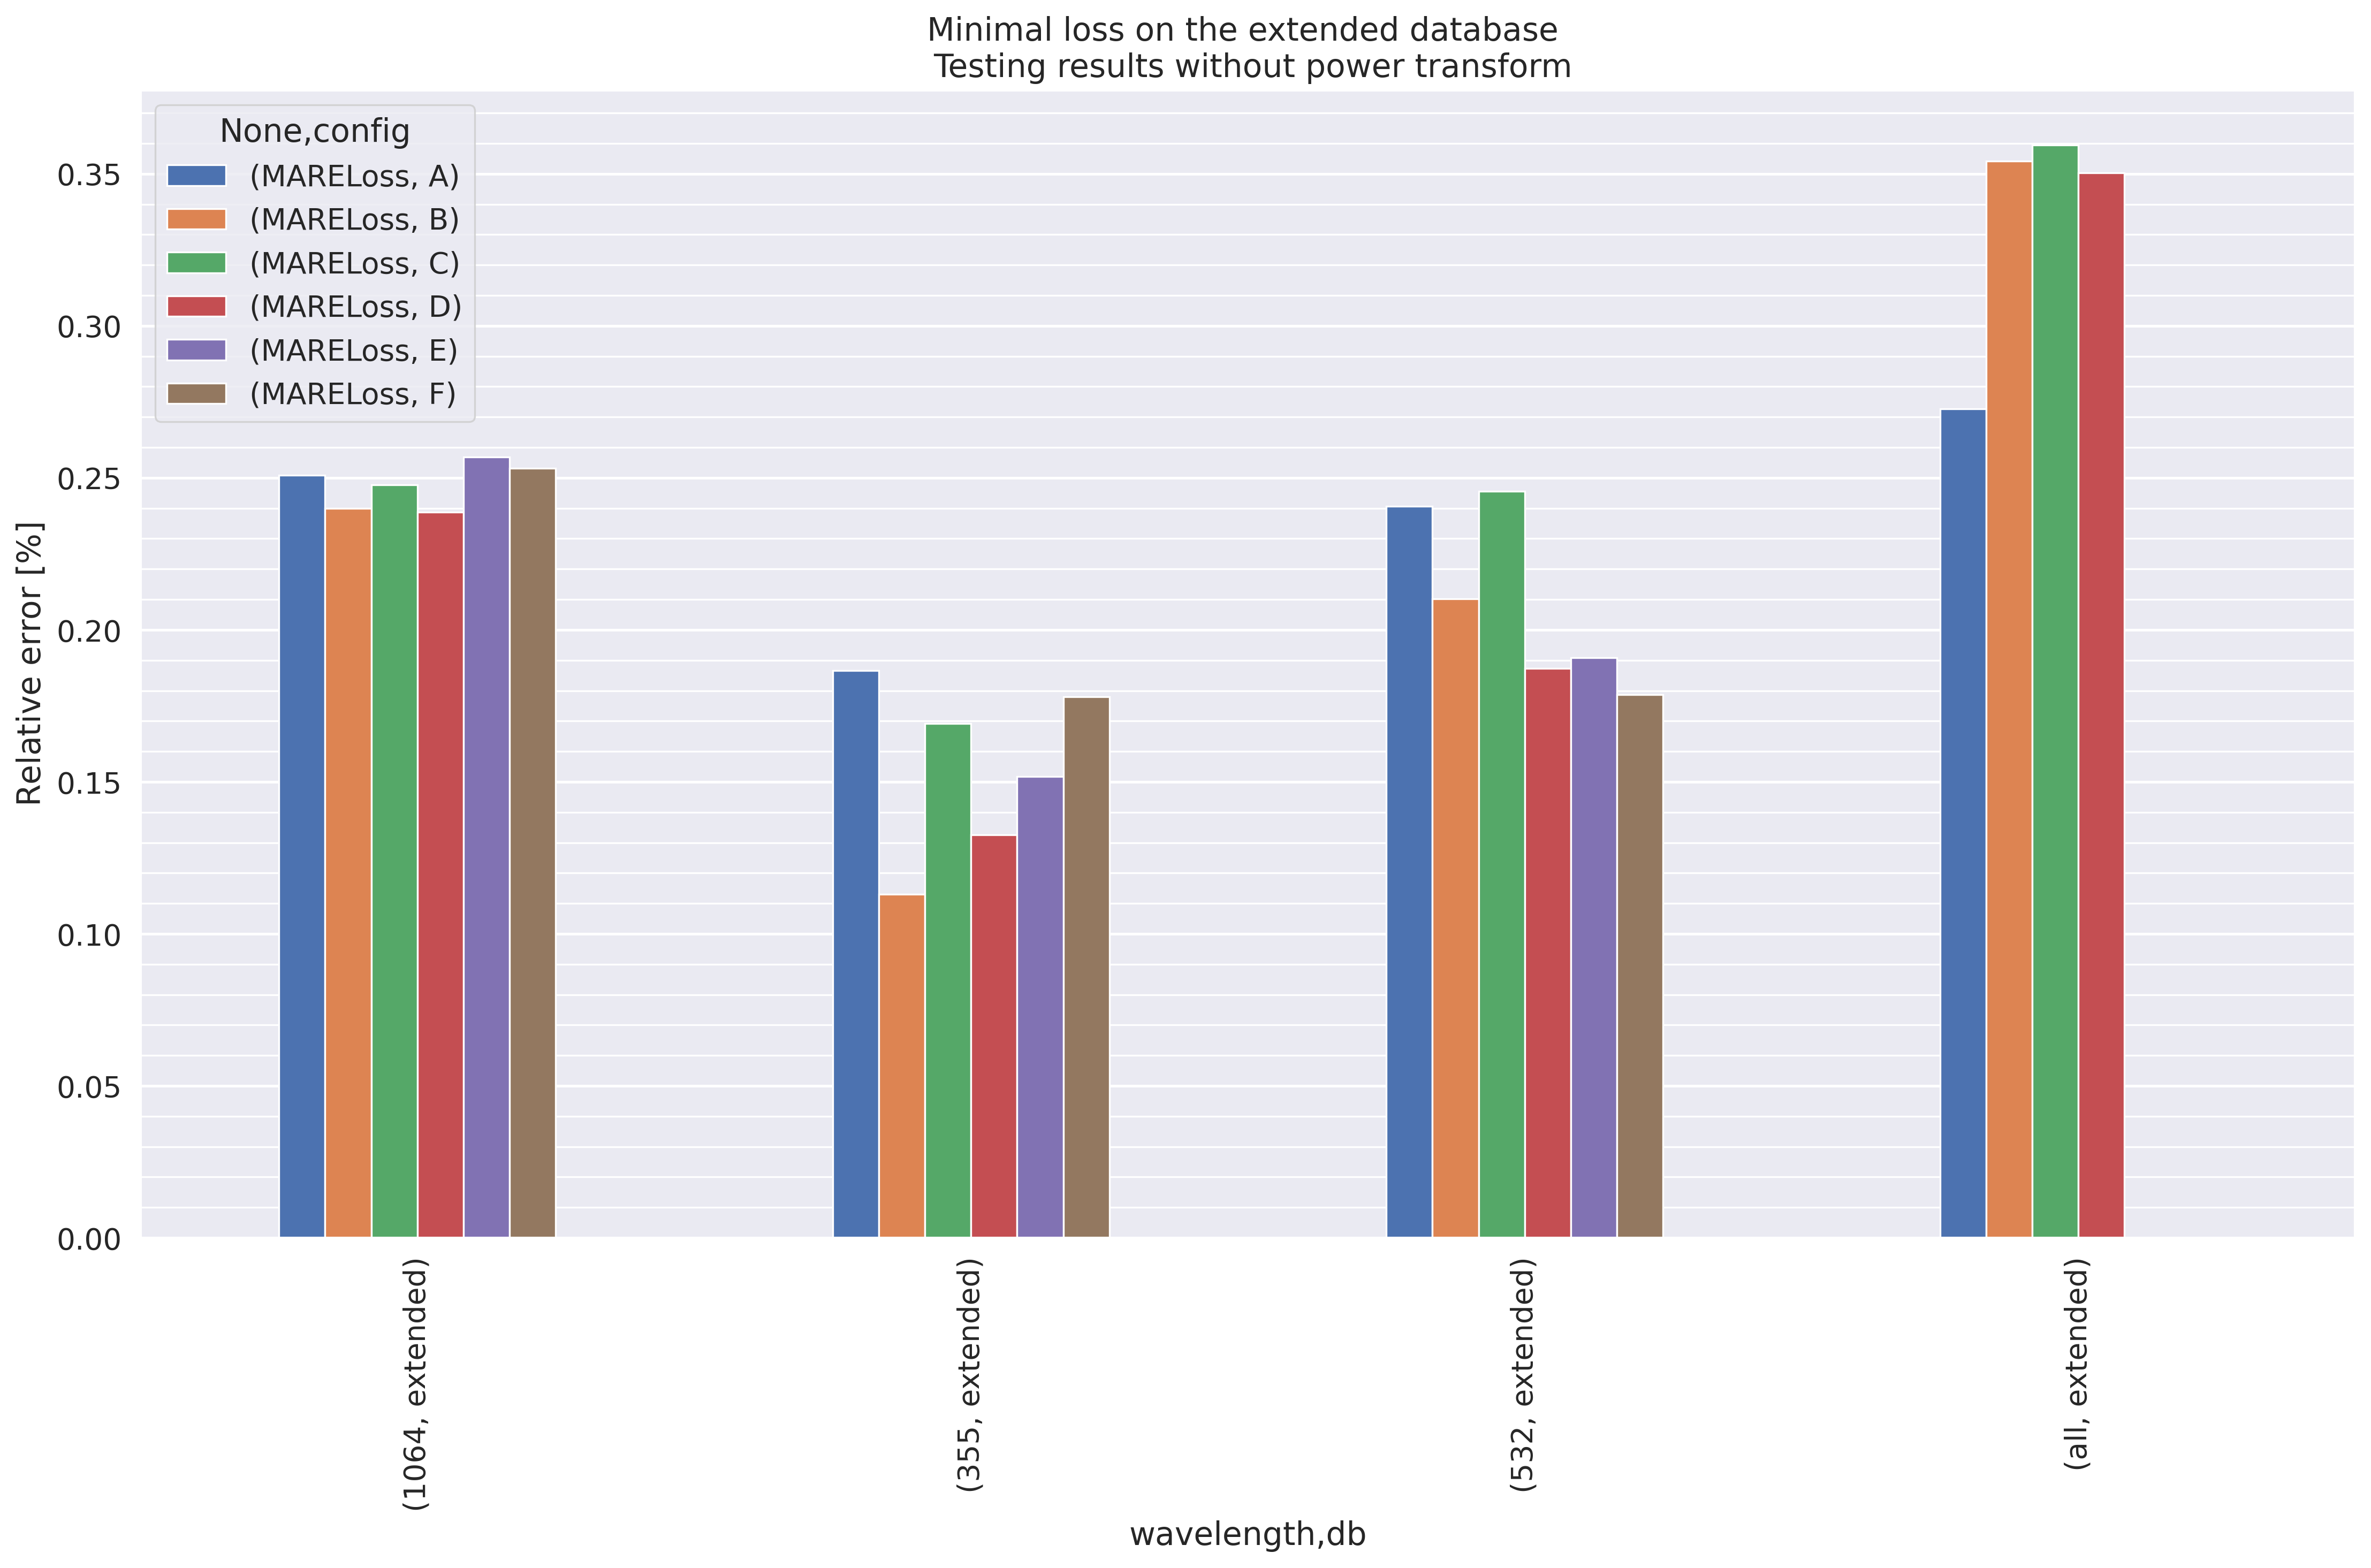

In [43]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','db'],#'use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(15, 10),
                 title='Minimal loss on the extended database \n Testing results without power transform')


